In [1]:
import numpy as np
import pandas as pd
import torch

from stat3007_timeseries_forecasting.utils import get_data_dir, get_sequences_multiple_tickers
from stat3007_timeseries_forecasting.dataset import SequenceDataset

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: mps


In [2]:
#Load the dataset
data = pd.read_csv(get_data_dir() + 'energy_sector_dataset.csv')
data.head()

Date       Open       High    Low      Close  Adj Close   Volume  \
0  2022-05-13  17.600000  18.950001  17.60  18.110001  18.110001  6325600   
1  2022-05-16  18.000000  18.590000  17.16  17.990000  17.990000  1283600   
2  2022-05-17  18.219999  18.370001  17.68  18.080000  18.080000   898000   
3  2022-05-18  18.049999  18.299999  17.77  17.980000  17.980000   790800   
4  2022-05-19  17.820000  18.000000  16.75  16.879999  16.879999  2122300   

  Ticker  Scaled_close  
0   ACDC      0.198526  
1   ACDC      0.185887  
2   ACDC      0.195366  
3   ACDC      0.184834  
4   ACDC      0.068984

In [3]:
#Test sequences will be of length 5 longer than train so we can fetch the last 5 datapoints to evaluate the model later on.
train_sequences, test_sequences = get_sequences_multiple_tickers(data, 100, 0.8)

In [4]:
import torch.optim as optim
from torch.utils.data import DataLoader

from stat3007_timeseries_forecasting.lstm.models import ForeCastModel

# Hyperparams
input_dim = 1
output_dim = 5
hidden_dim = 512
num_layers = 1

num_epochs = 10
batch_size = 32

model = ForeCastModel(input_dim, hidden_dim, num_layers, output_dim, device).to(device)

train_dataset = SequenceDataset(train_sequences)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss(reduction='mean')

In [5]:
from stat3007_timeseries_forecasting.utils import train
train(model, optimizer, train_dataloader, num_epochs, criterion, prediction_horizon=5)

Epoch 1/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:20<00:00, 49.35it/s]


Epoch 1/10, Average Loss: 0.0066979648


Epoch 2/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:22<00:00, 47.72it/s]


Epoch 2/10, Average Loss: 0.0020876578


Epoch 3/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:21<00:00, 48.63it/s]


Epoch 3/10, Average Loss: 0.0020089917


Epoch 4/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:15<00:00, 52.47it/s]


Epoch 4/10, Average Loss: 0.0019572486


Epoch 5/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:11<00:00, 55.04it/s]


Epoch 5/10, Average Loss: 0.0019188947


Epoch 6/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:13<00:00, 53.94it/s]


Epoch 6/10, Average Loss: 0.0018904325


Epoch 7/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:11<00:00, 55.62it/s]


Epoch 7/10, Average Loss: 0.0018668081


Epoch 8/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:18<00:00, 50.05it/s]


Epoch 8/10, Average Loss: 0.0018469095


Epoch 9/10: 100%|███████████████████████████████████████████████| 3952/3952 [01:21<00:00, 48.56it/s]


Epoch 9/10, Average Loss: 0.0018320466


Epoch 10/10: 100%|██████████████████████████████████████████████| 3952/3952 [01:19<00:00, 49.89it/s]

Epoch 10/10, Average Loss: 0.0018175253


In [6]:
torch.save(model, 'model_tmp_2.pth')

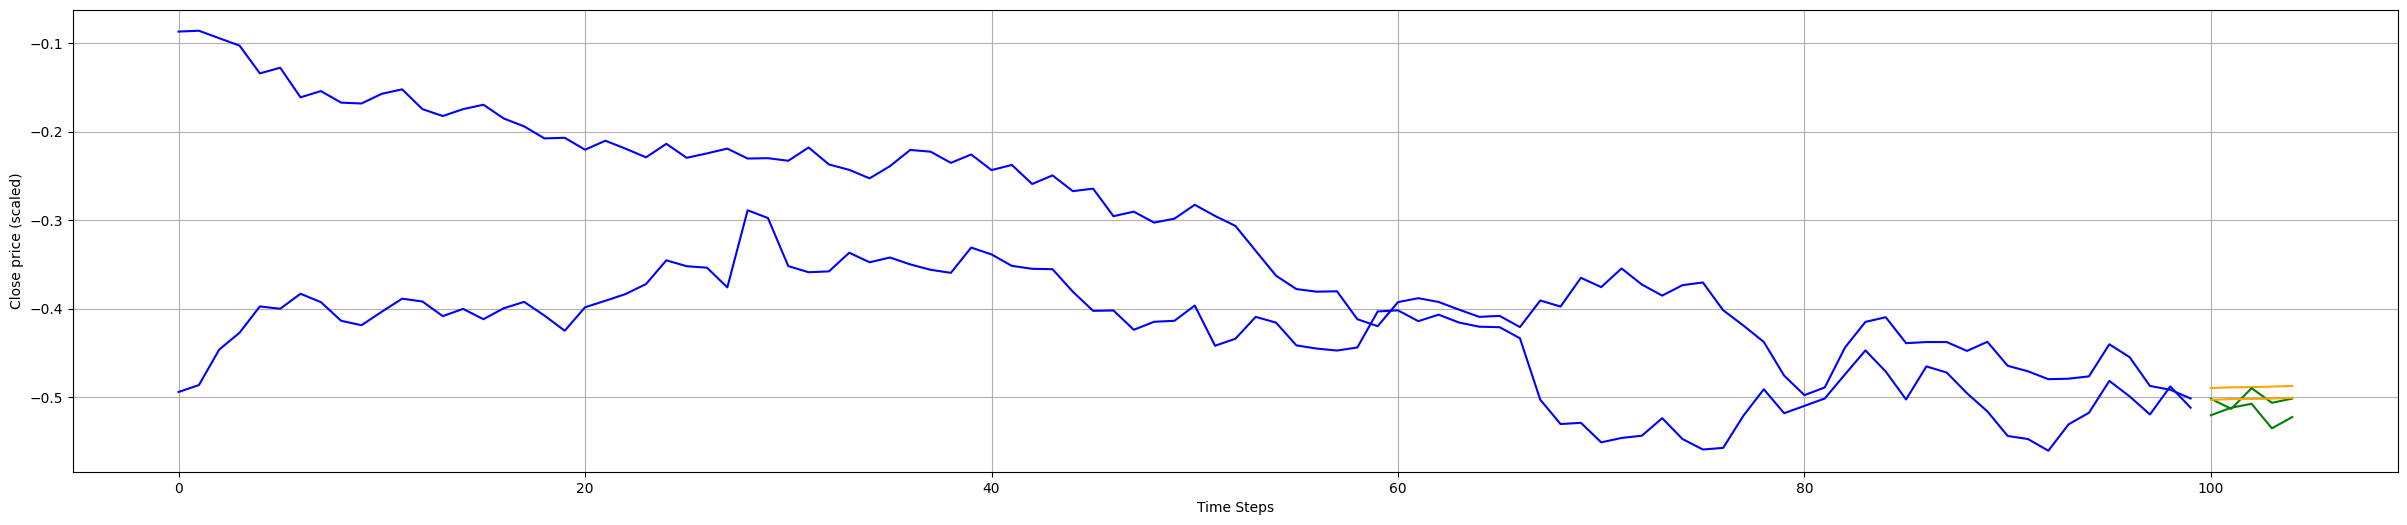

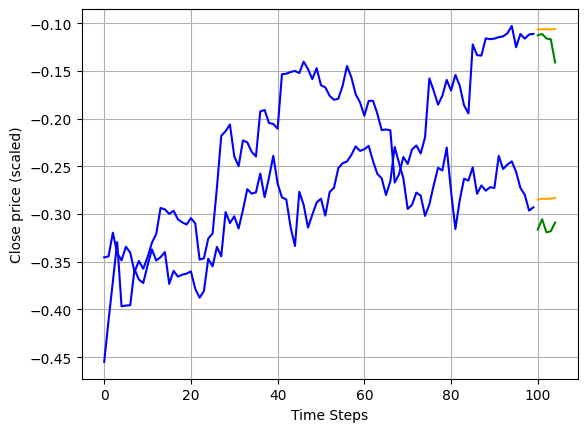

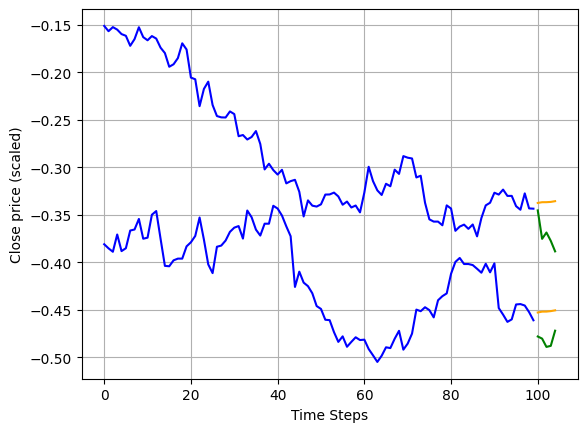

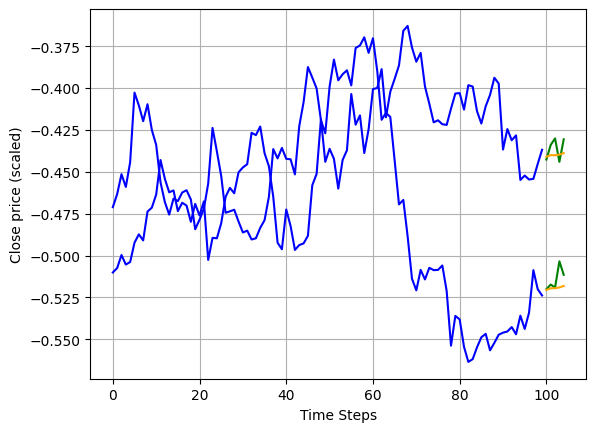

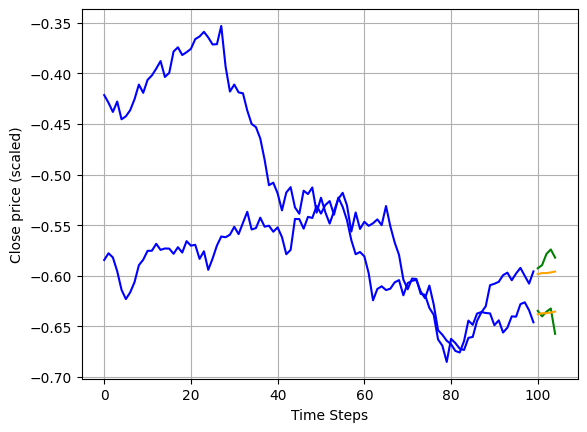

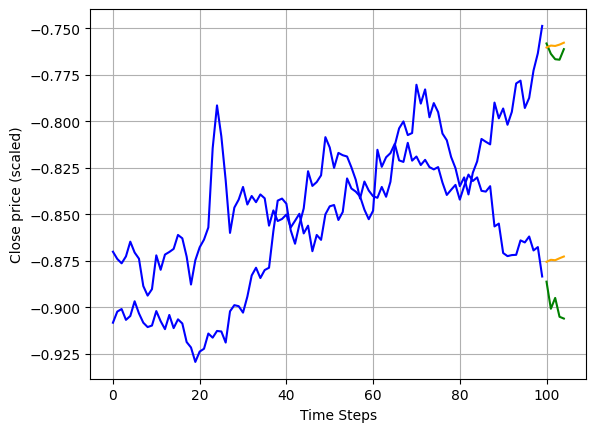

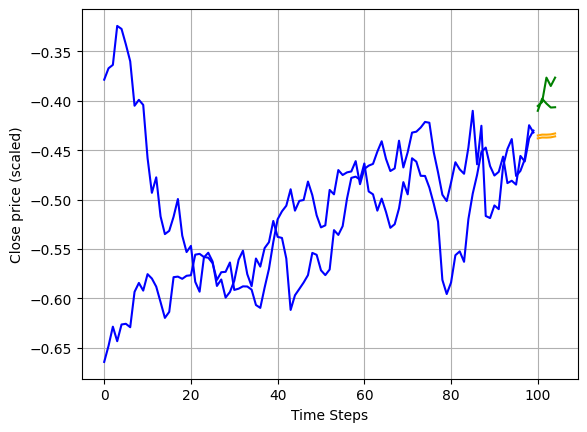

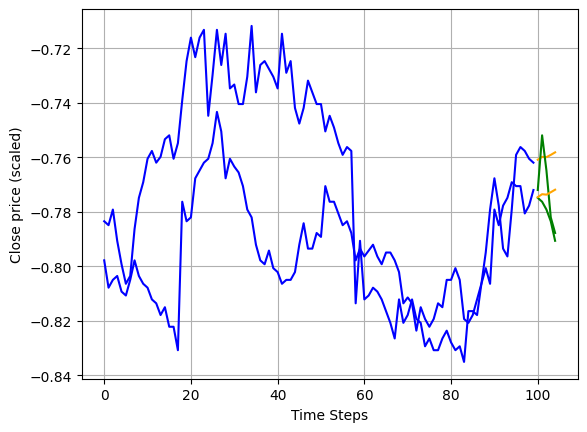

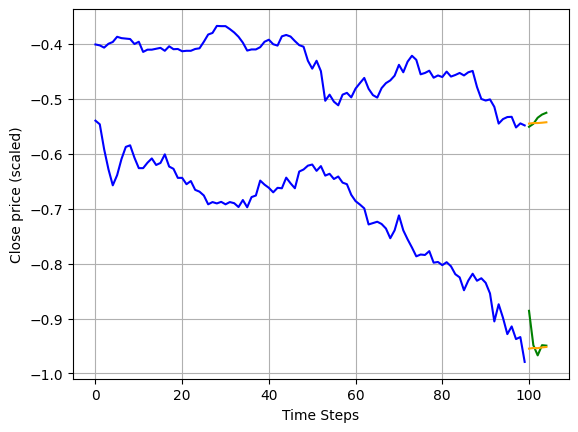

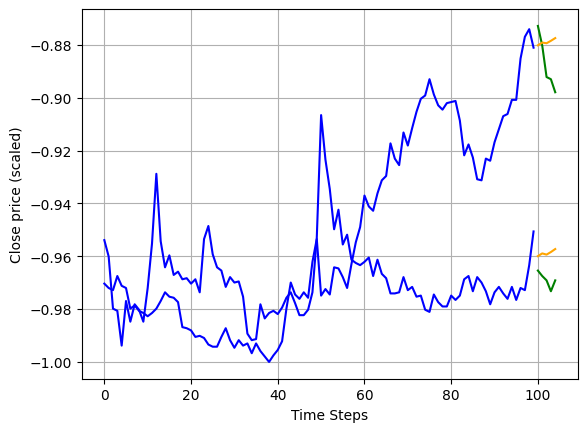

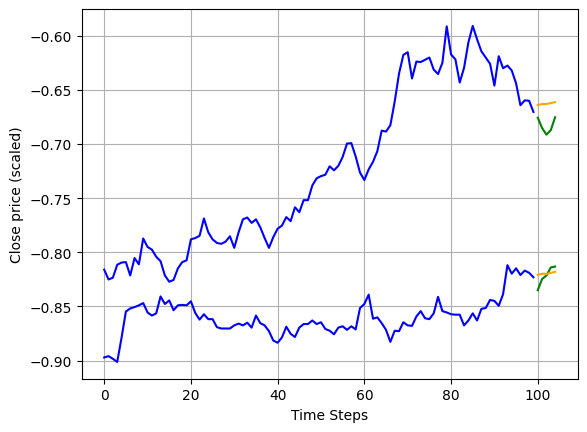

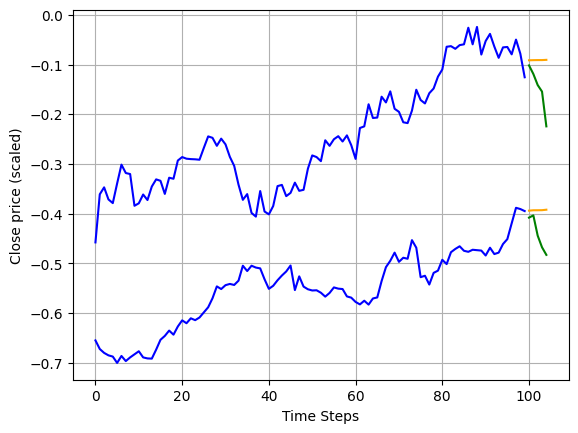

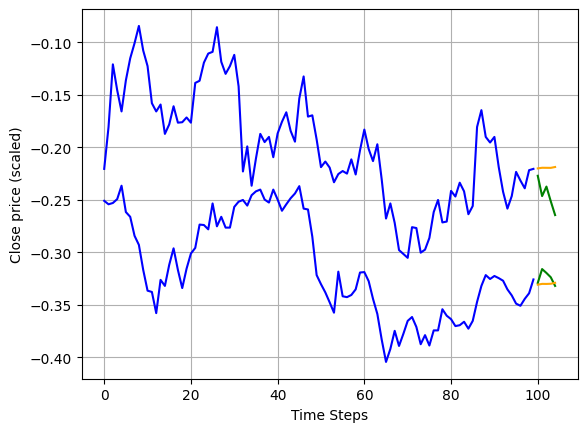

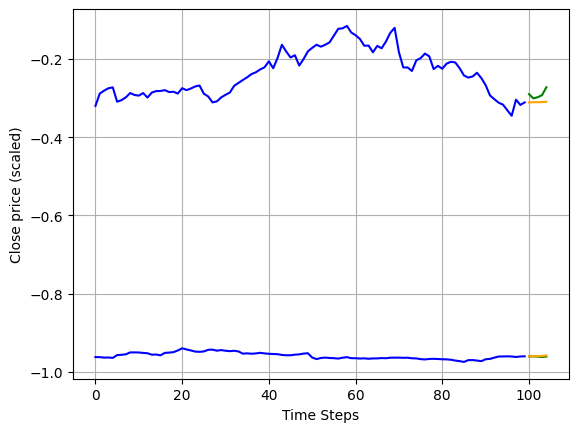

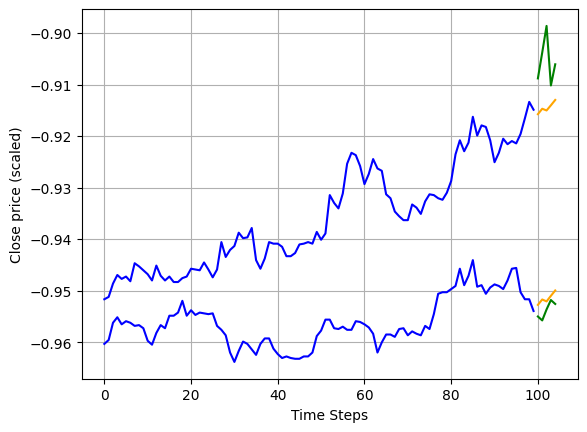

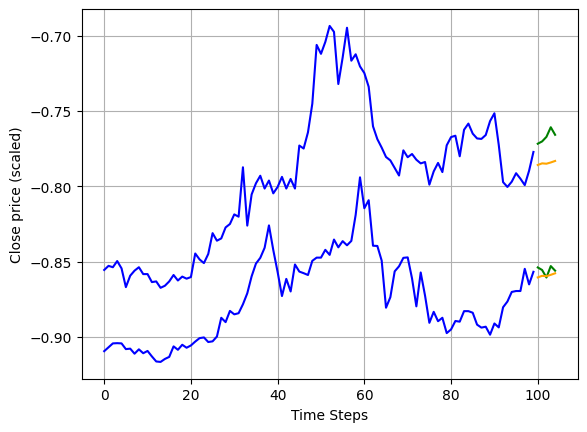

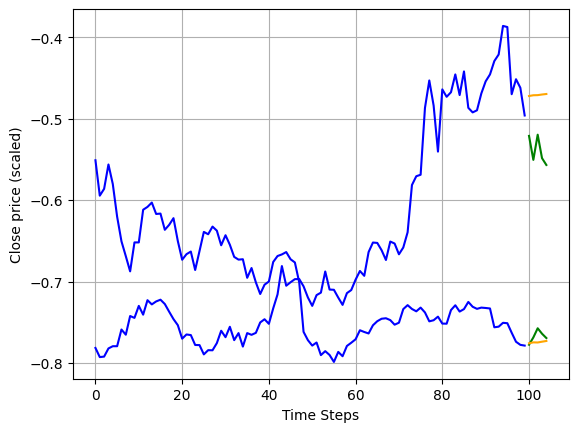

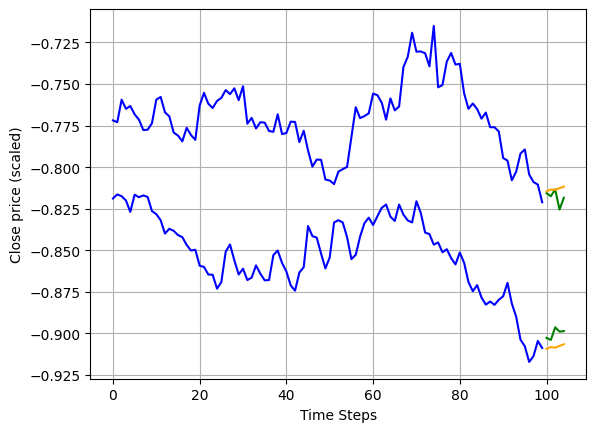

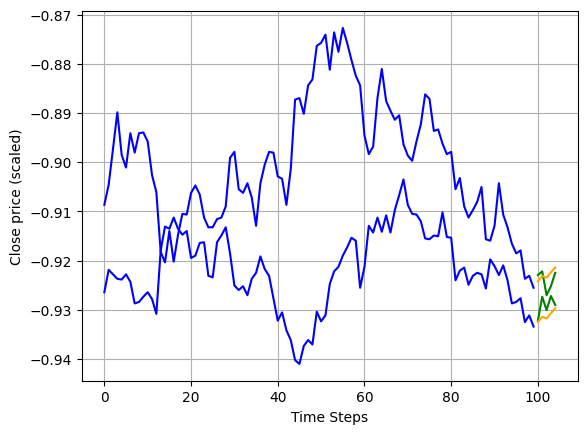

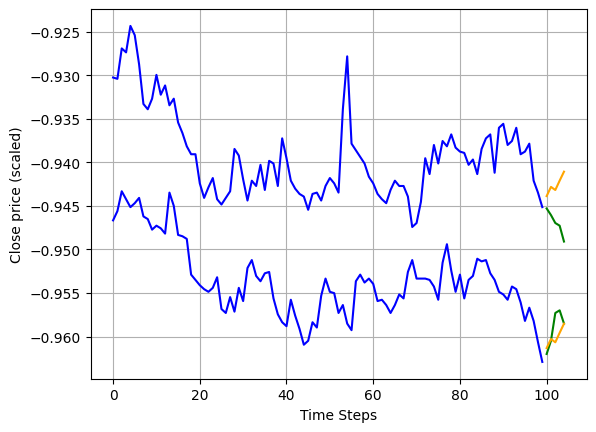

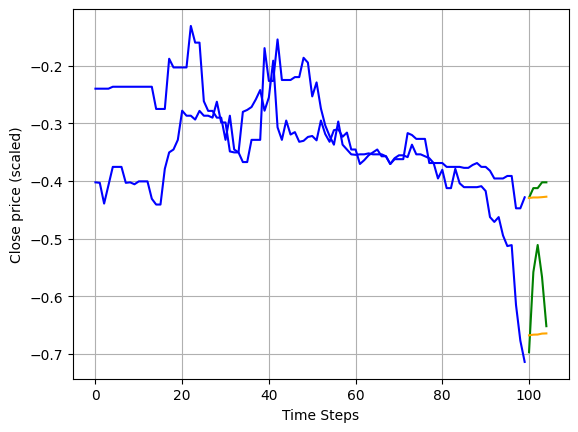

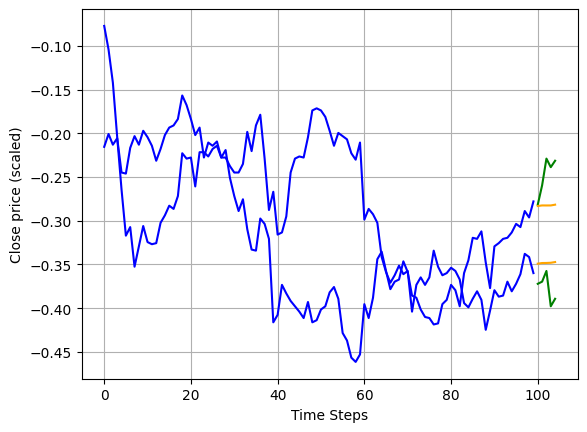

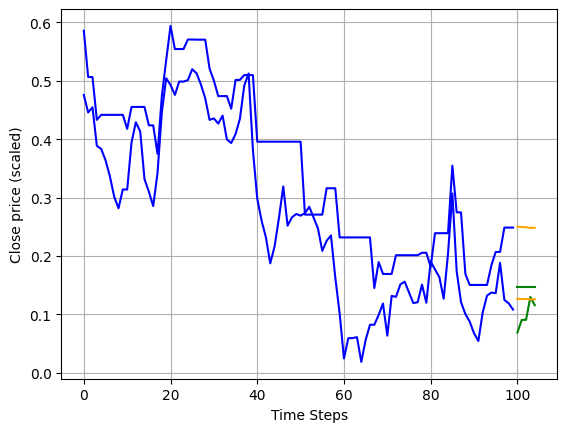

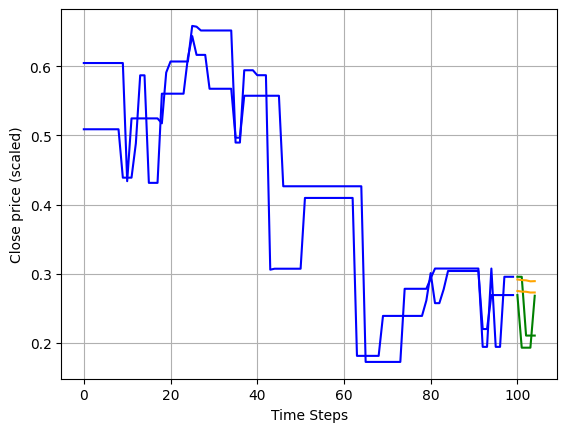

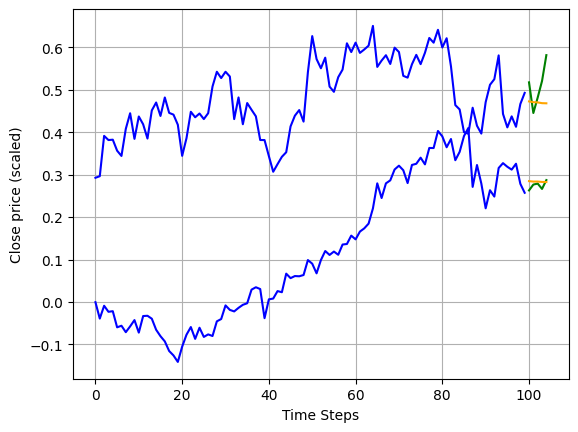

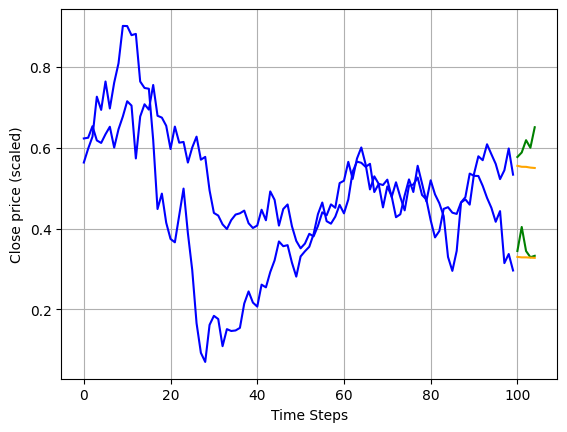

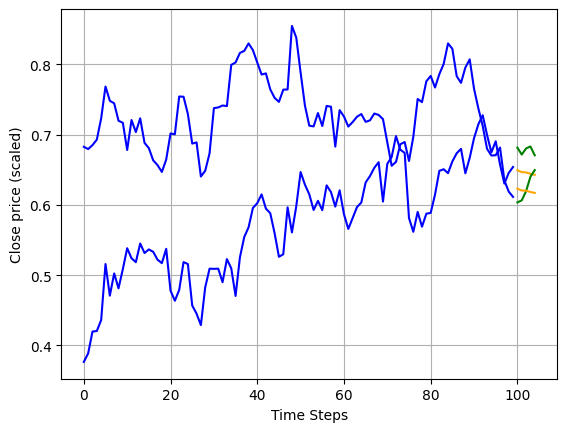

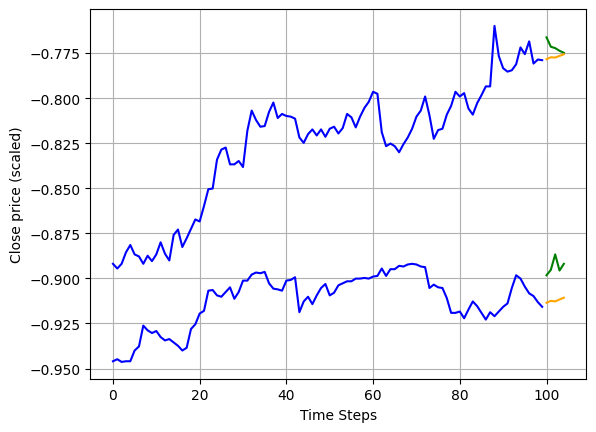

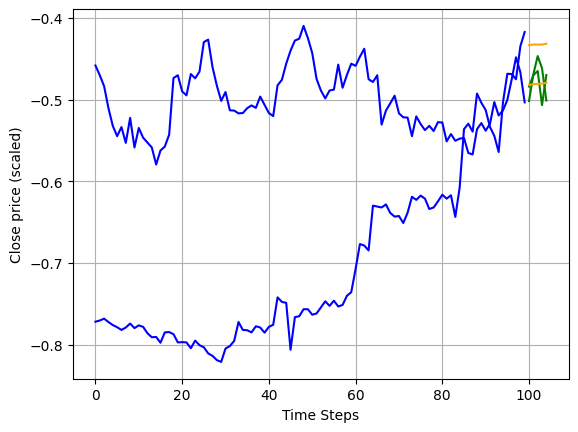

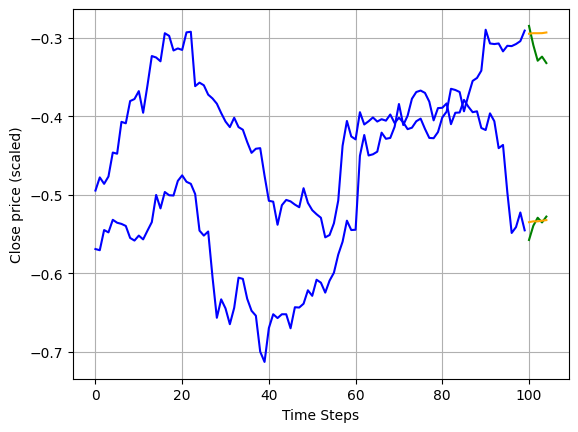

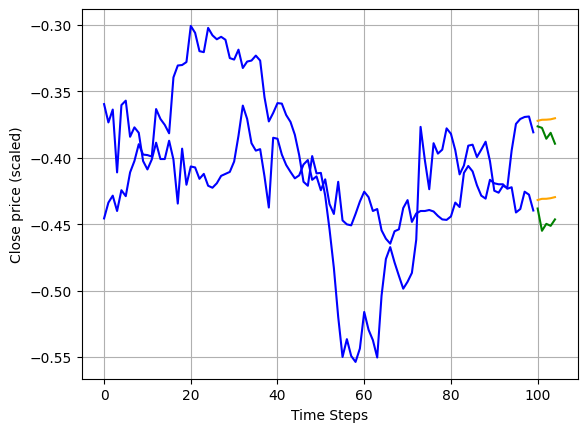

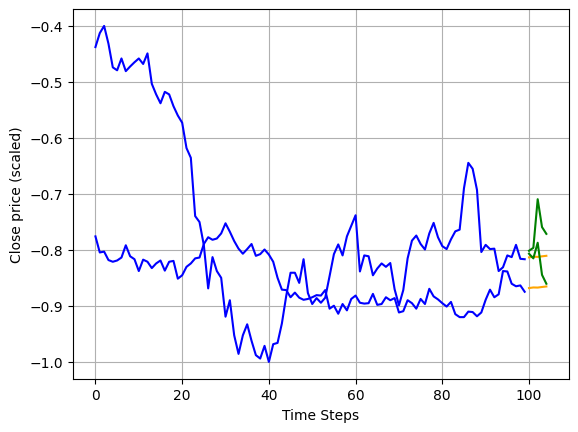

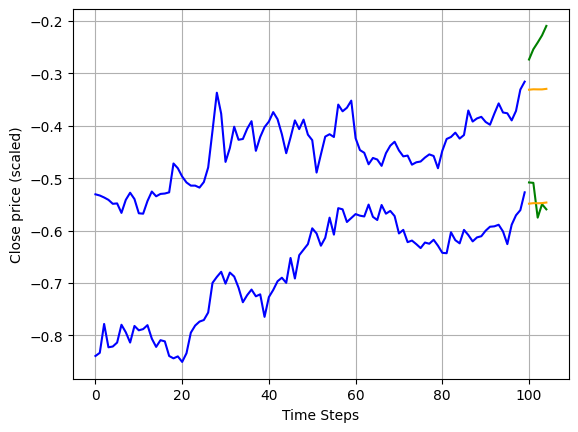

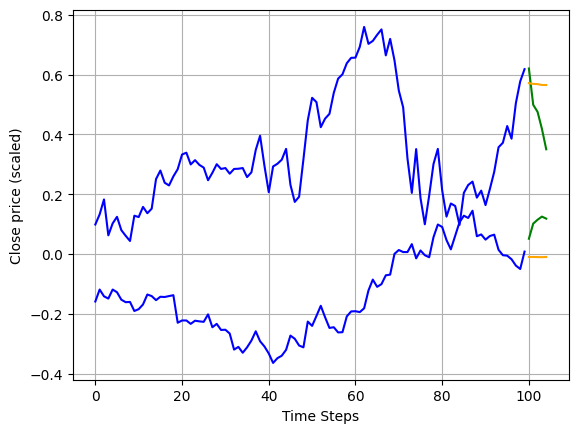

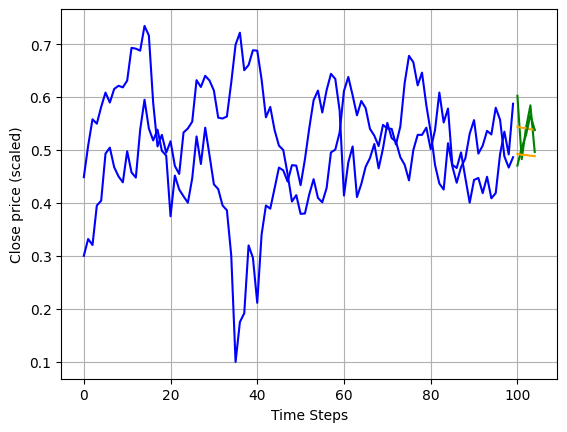

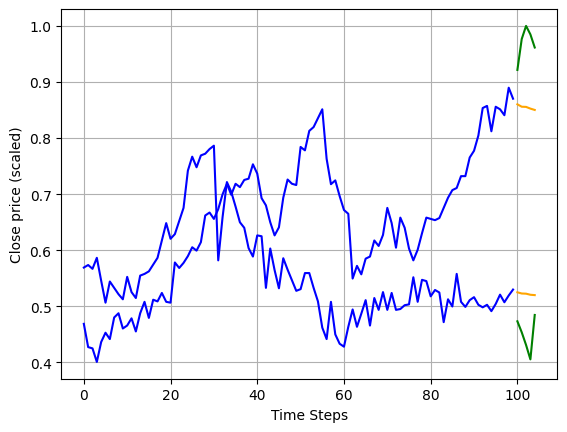

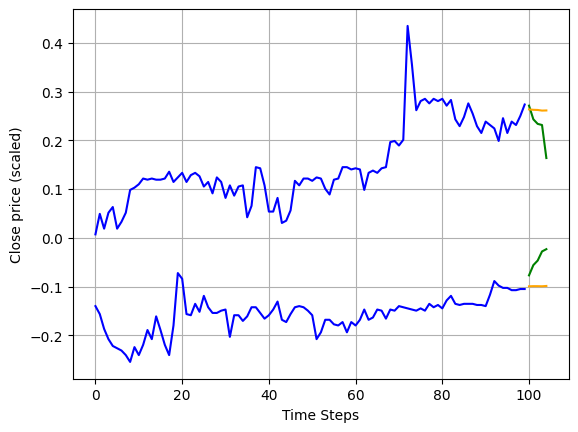

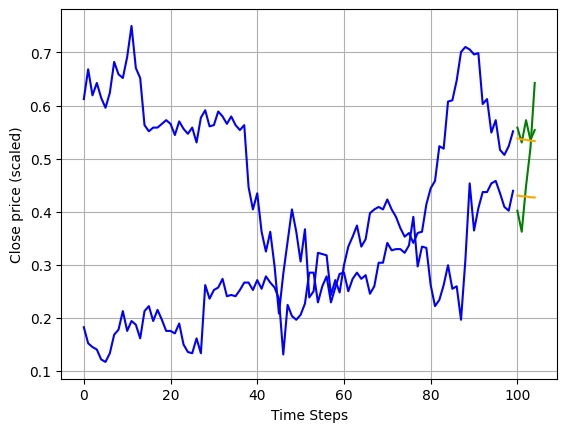

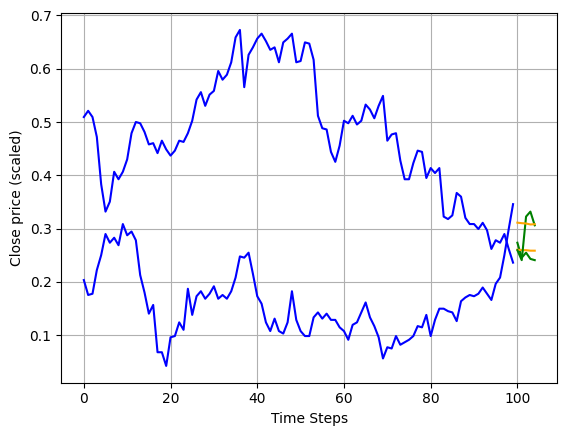

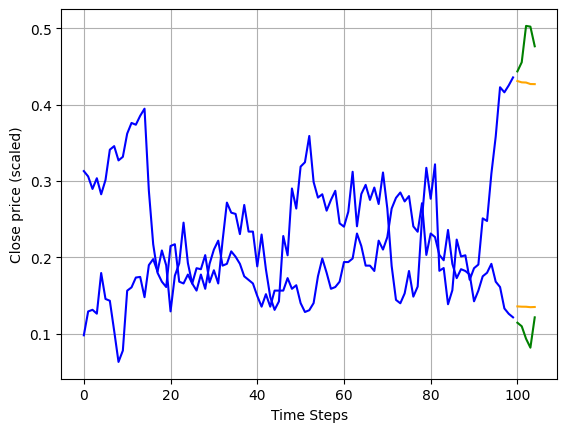

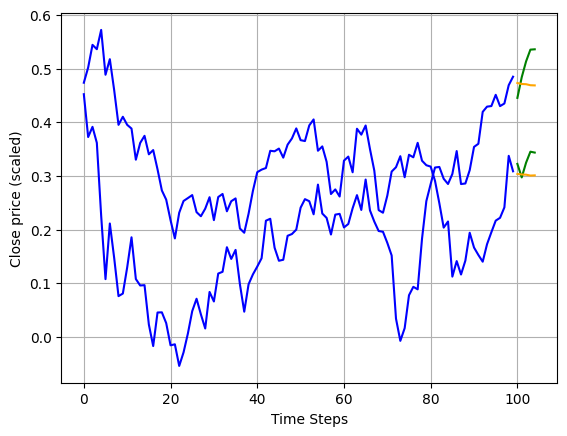

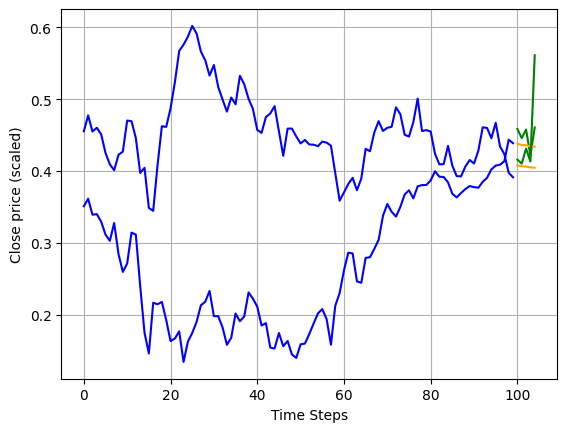

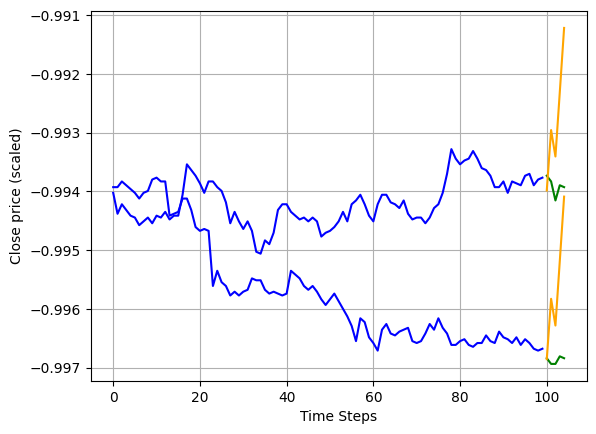

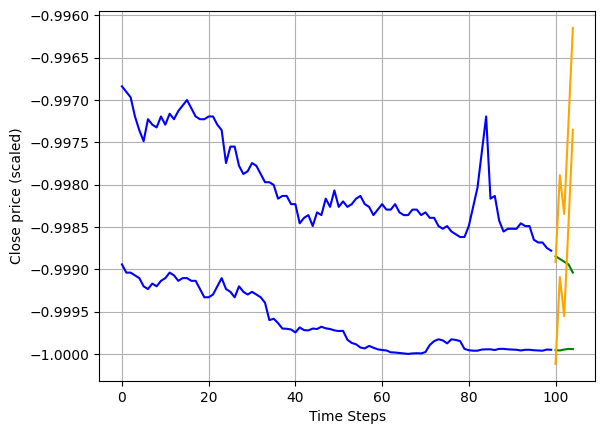

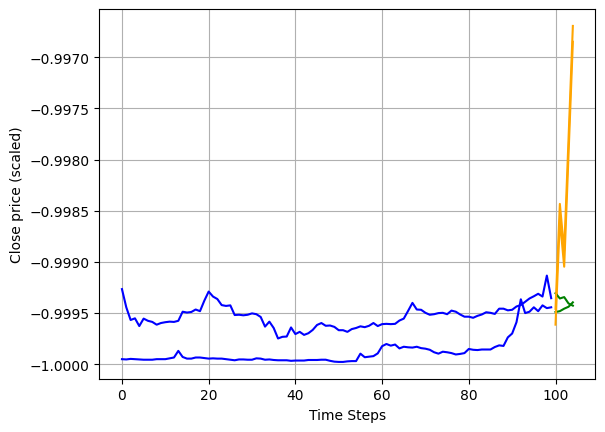

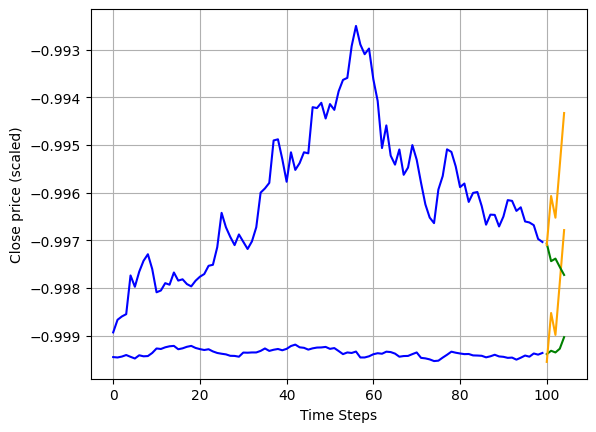

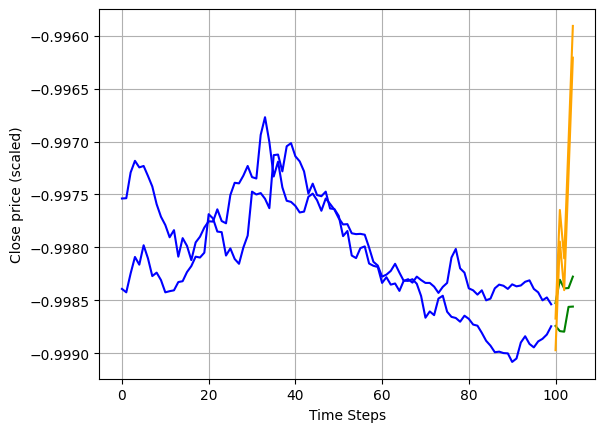

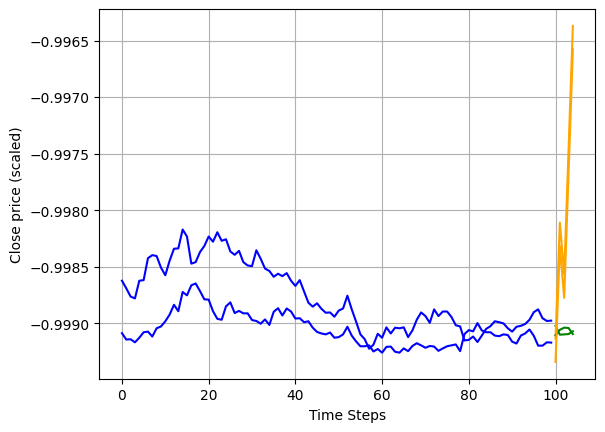

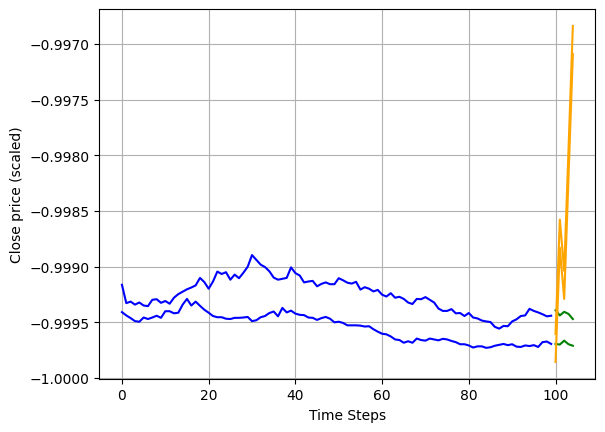

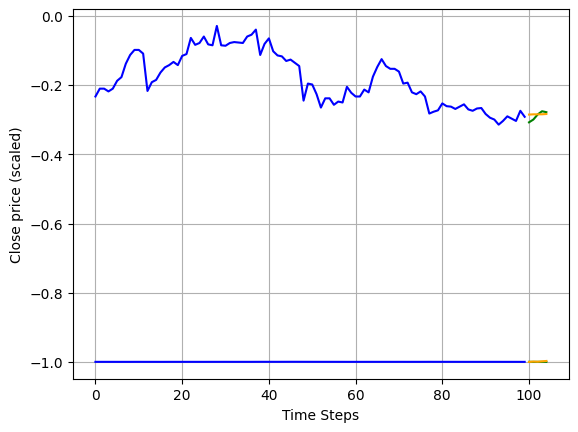

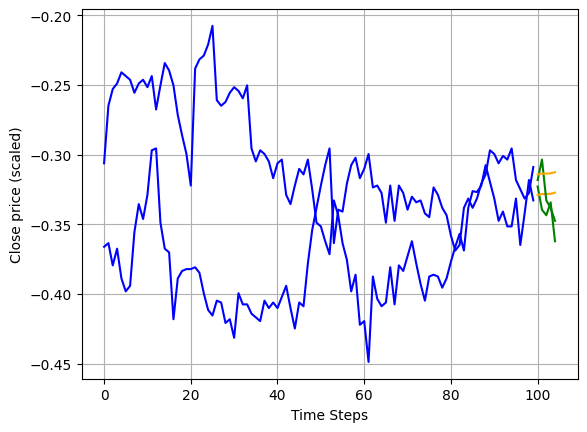

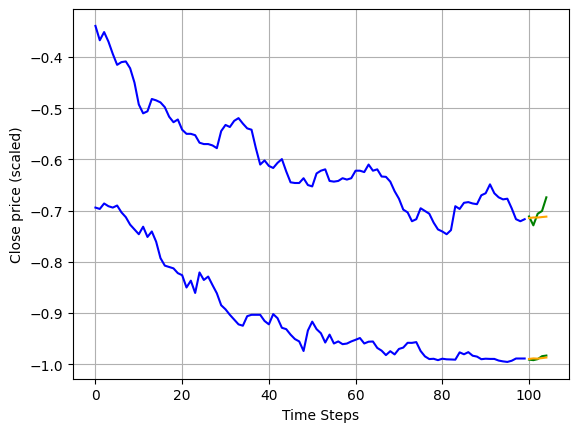

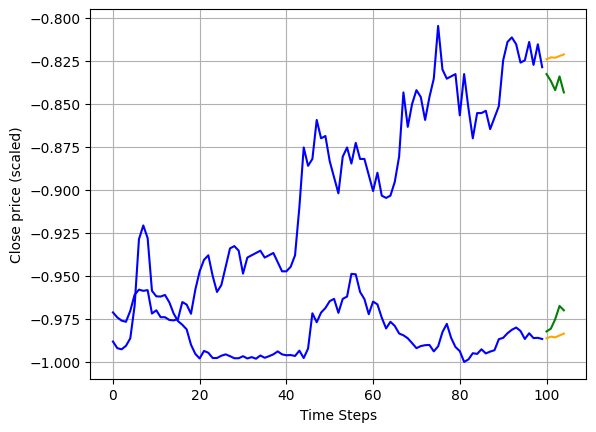

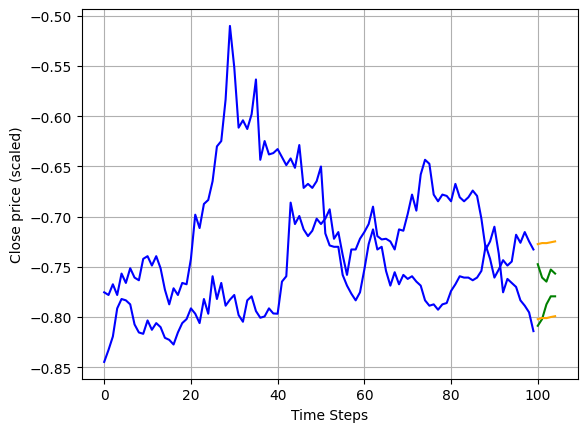

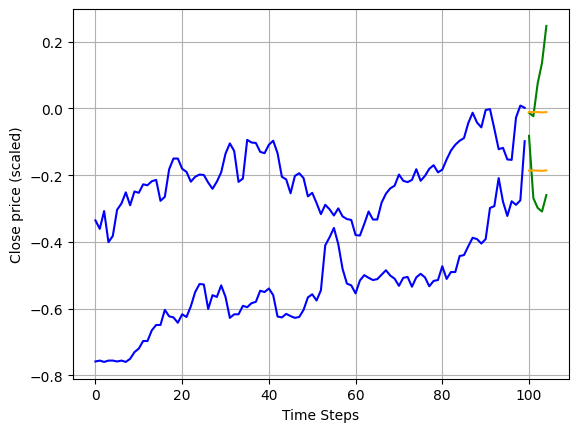

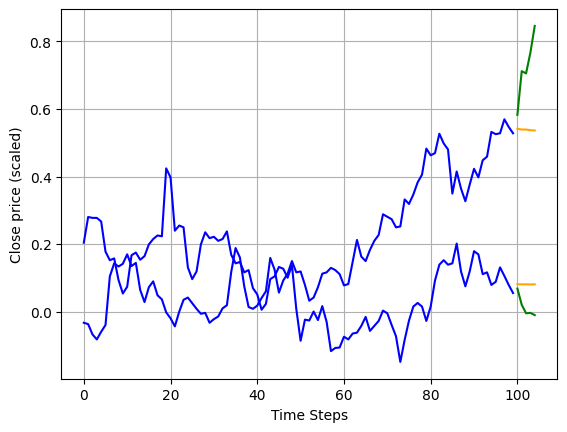

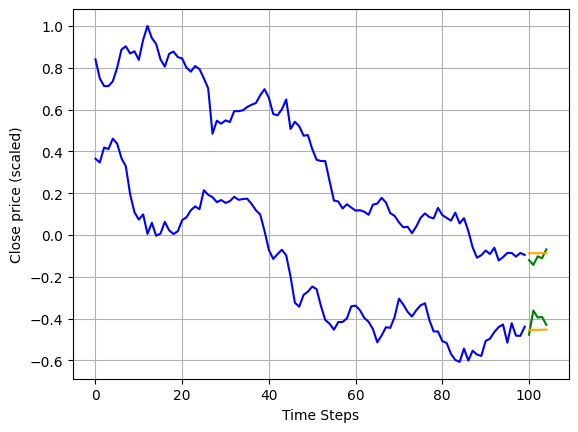

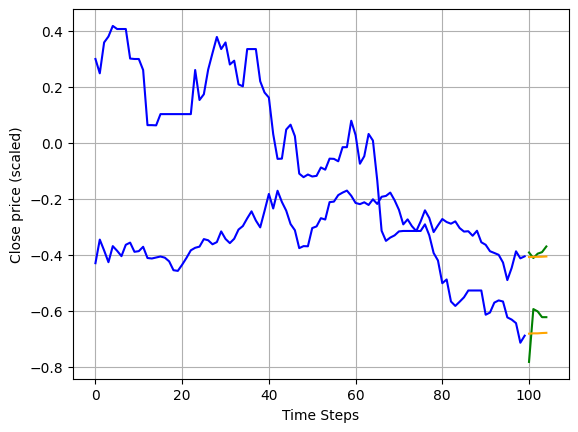

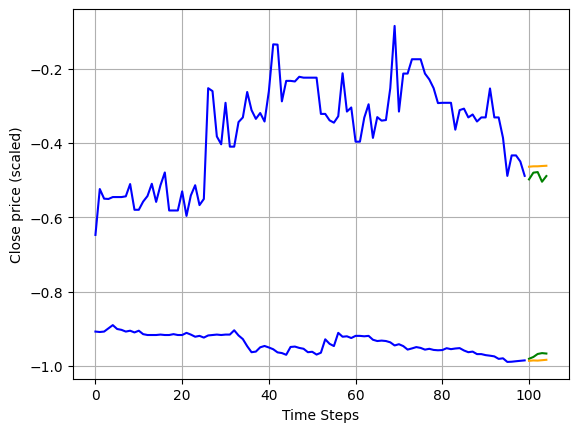

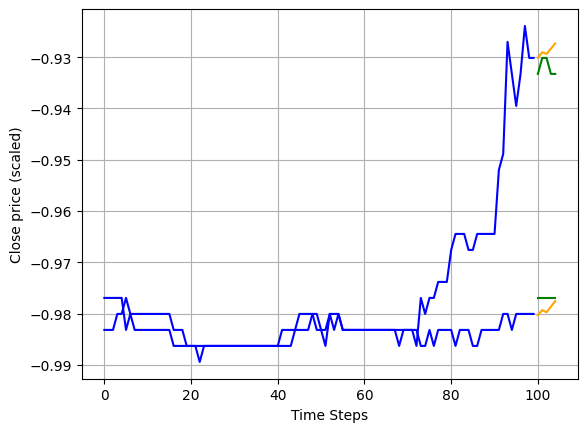

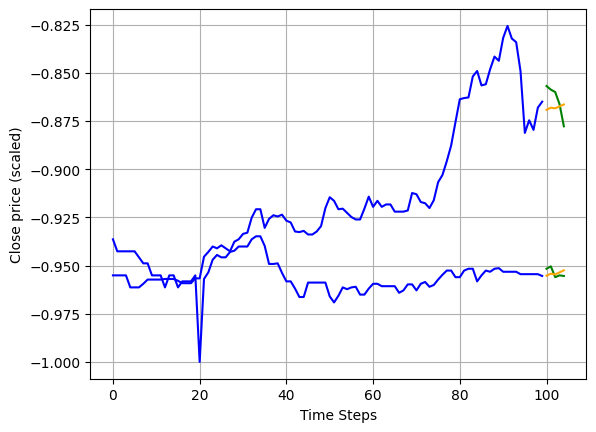

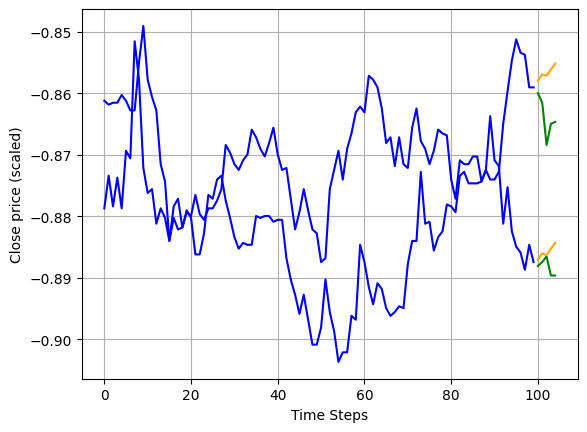

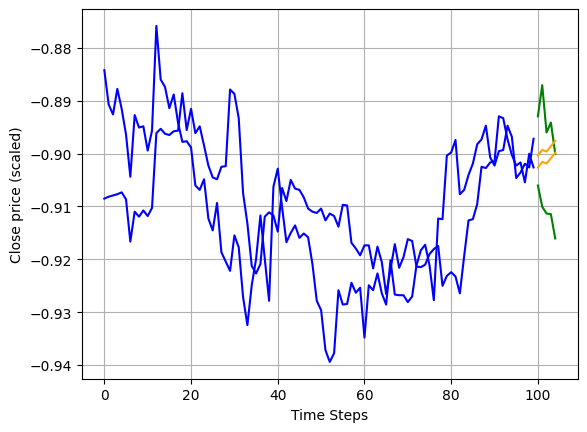

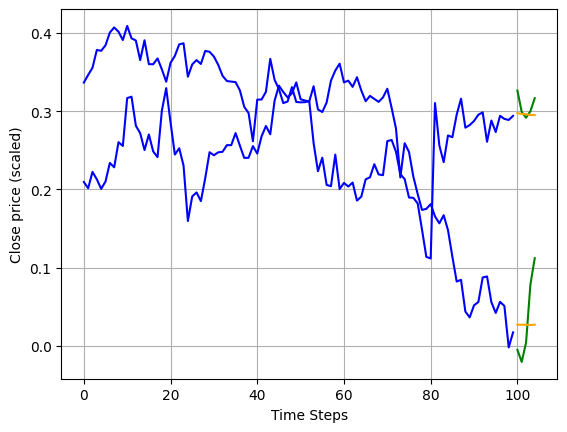

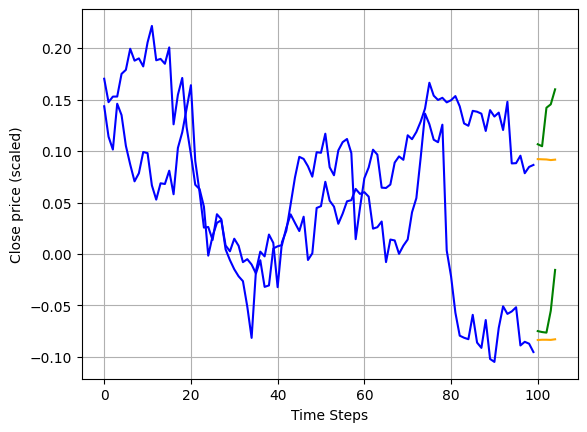

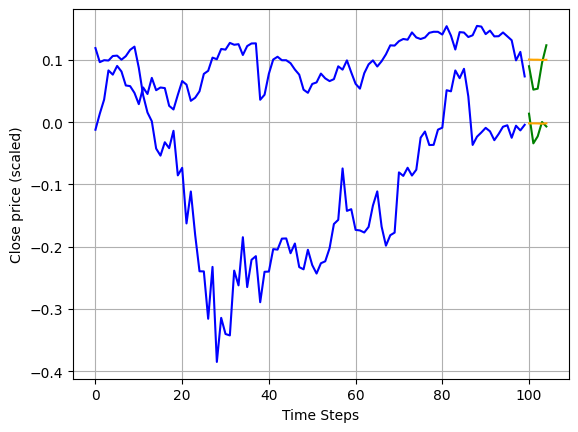

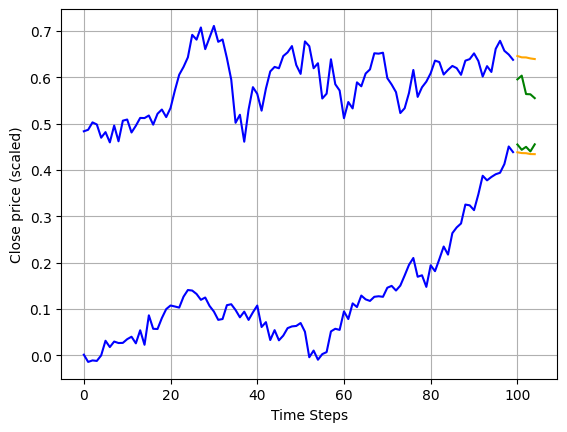

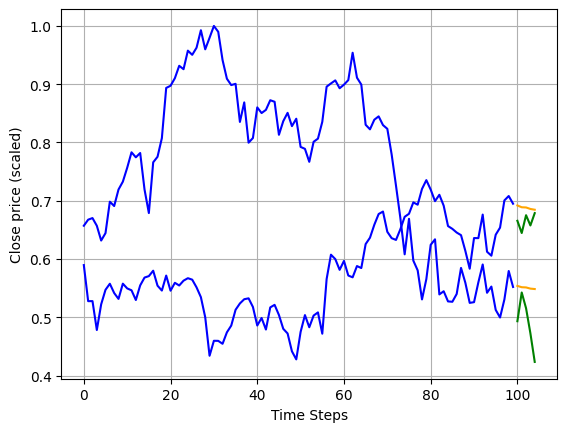

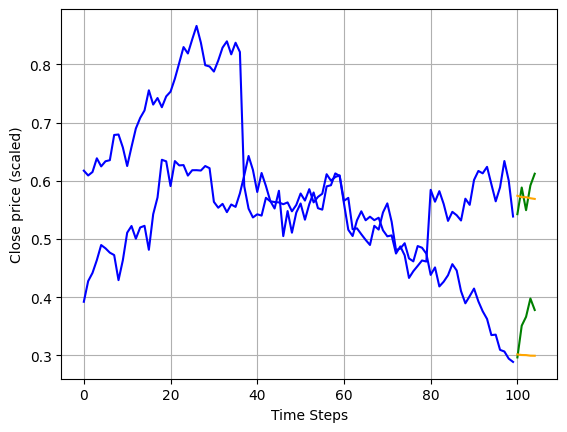

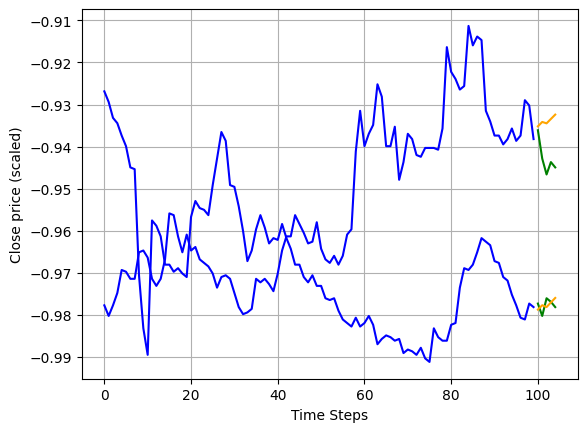

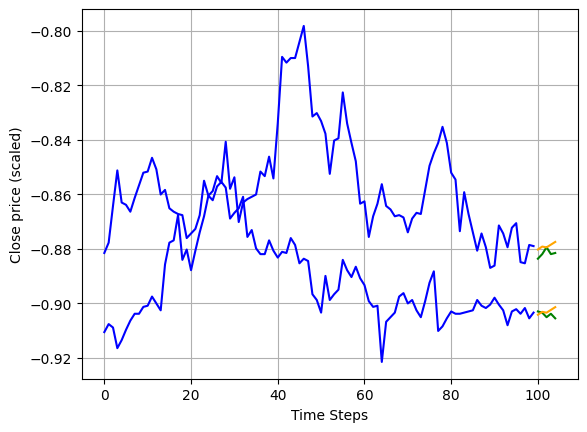

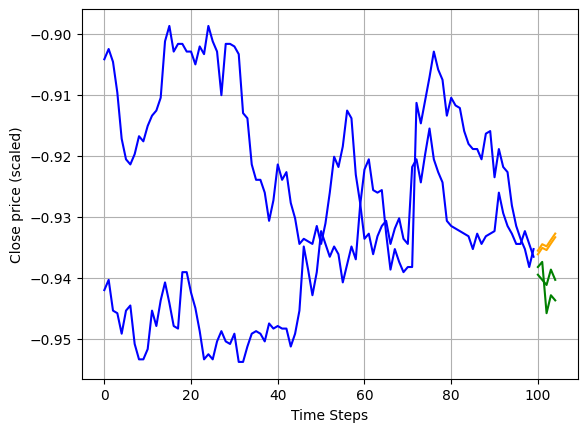

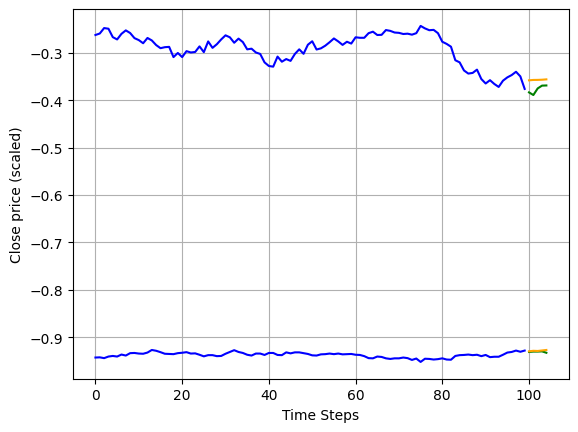

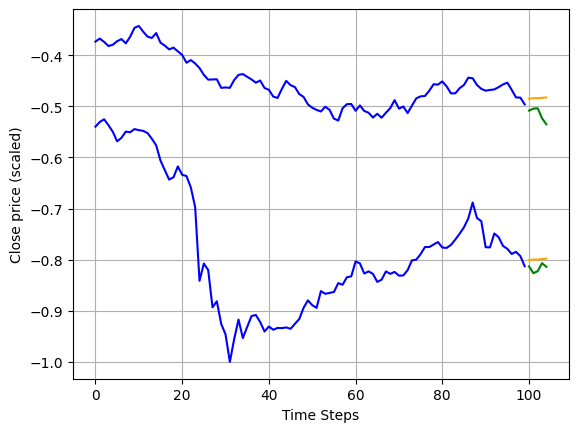

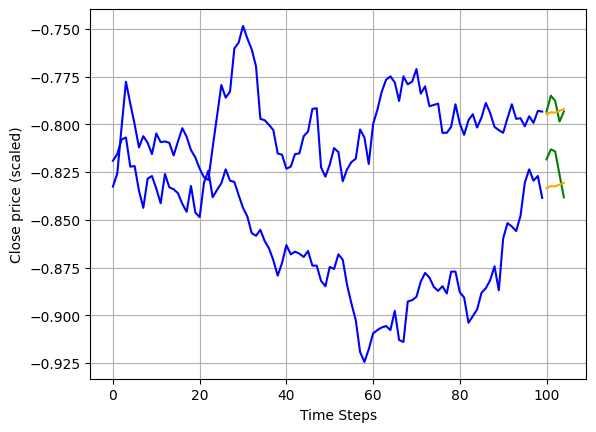

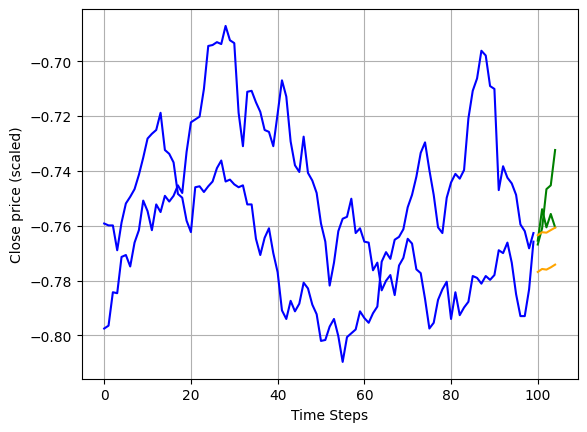

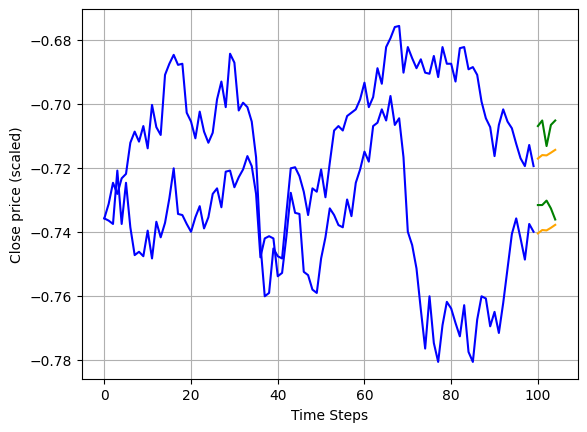

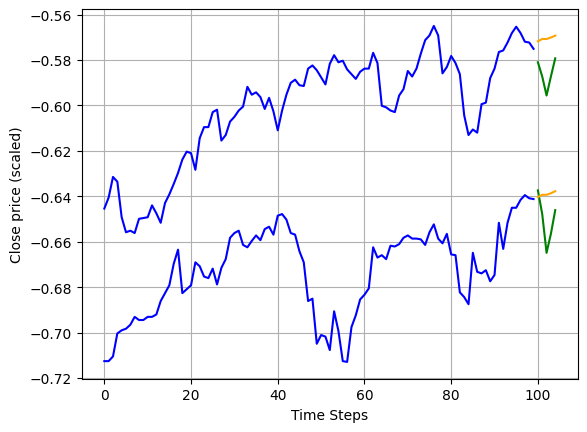

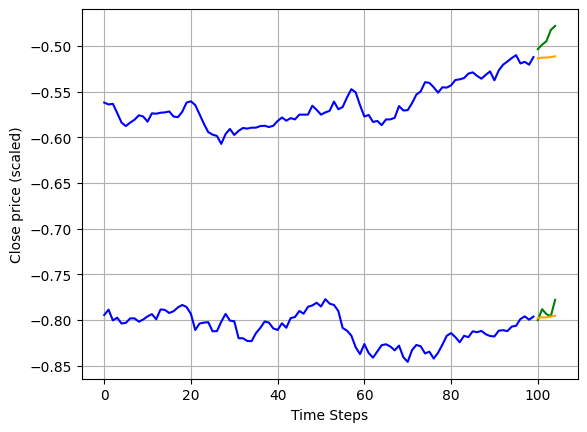

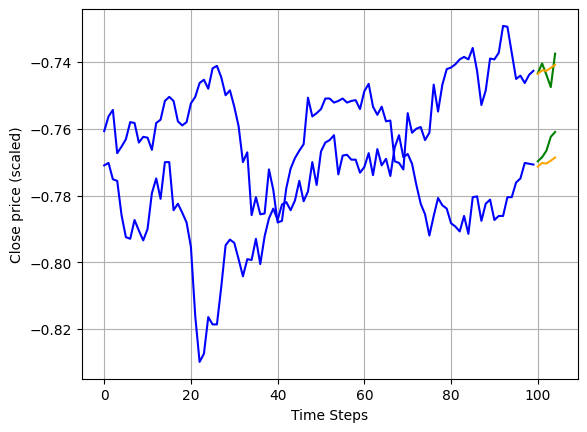

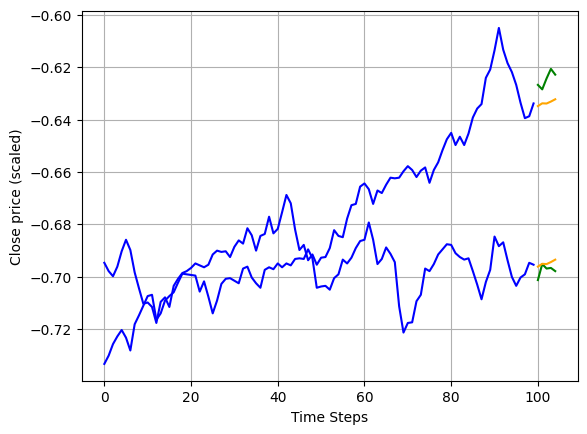

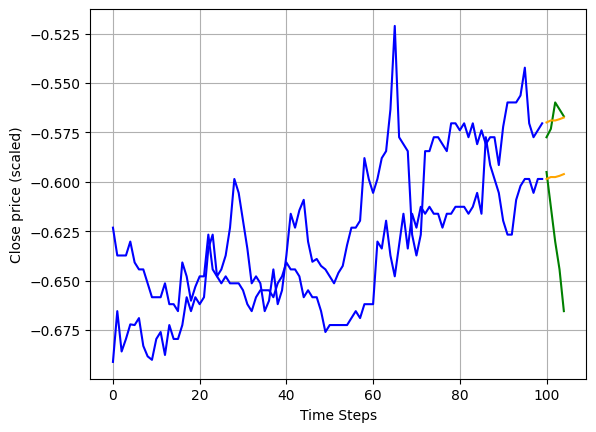

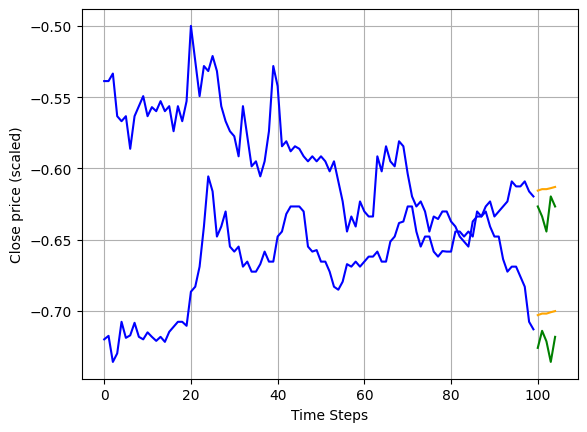

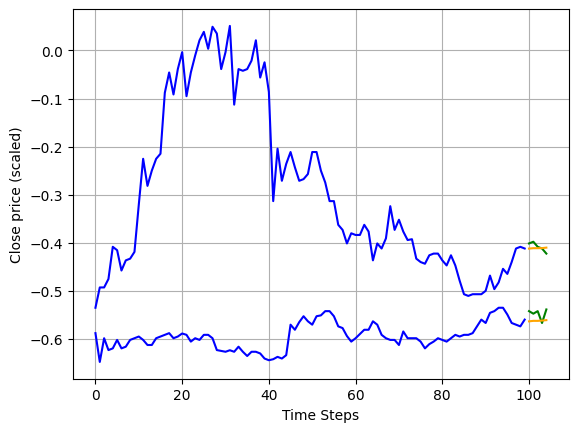

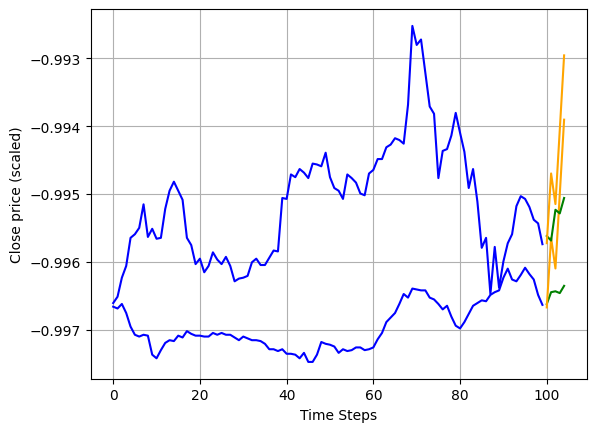

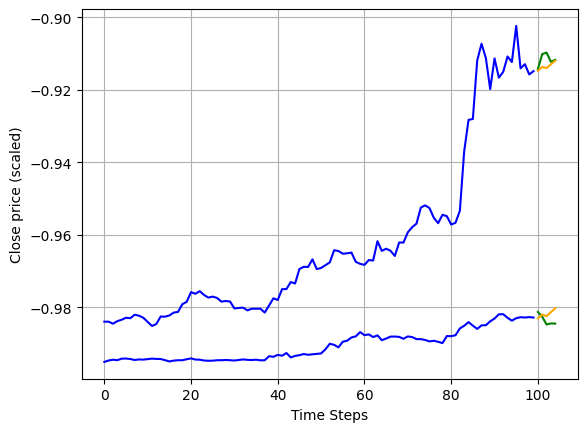

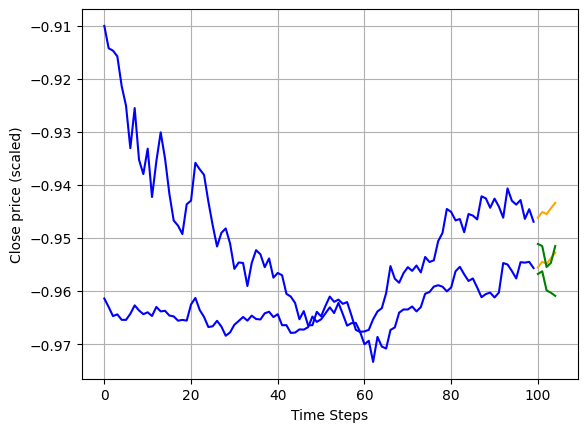

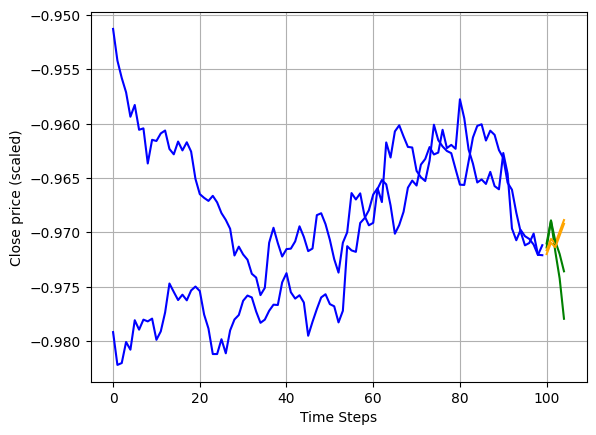

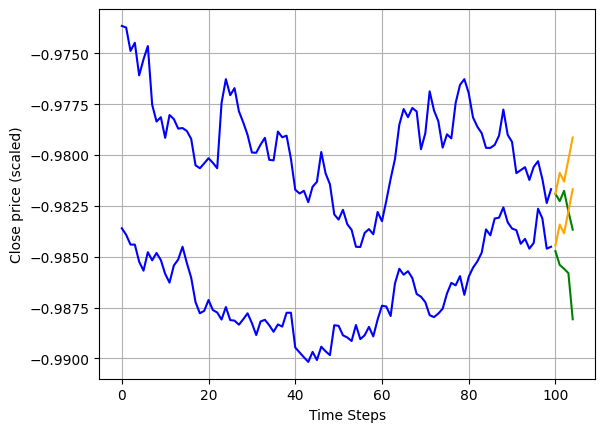

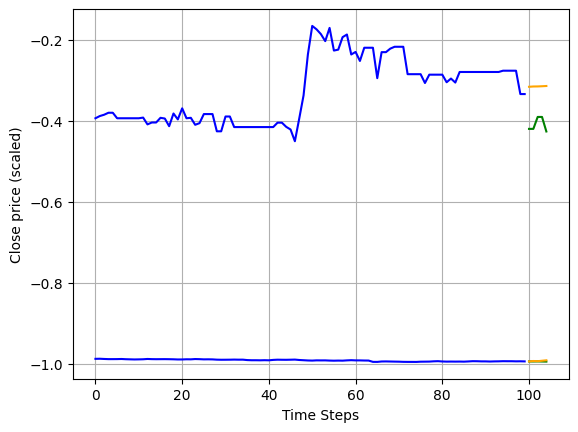

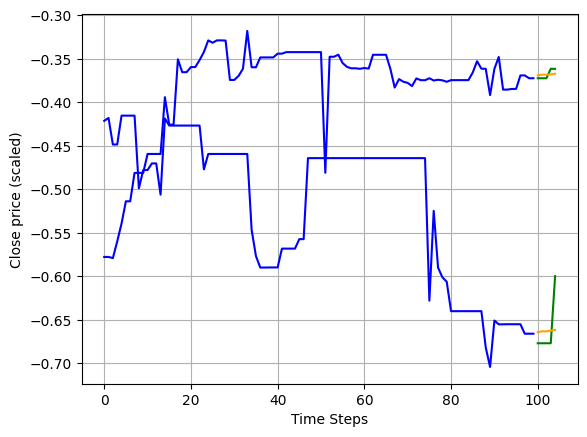

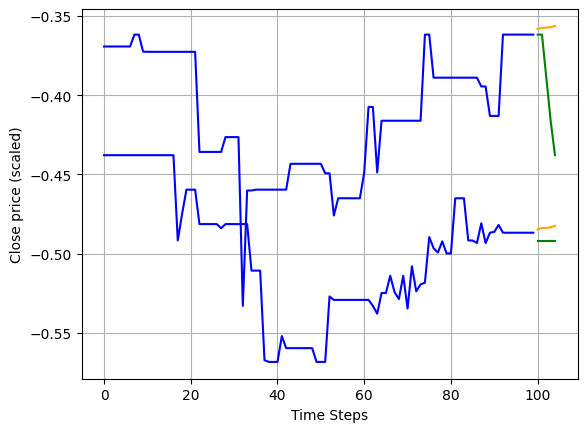

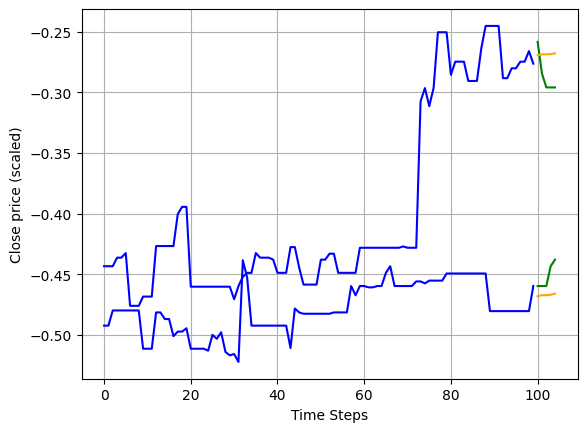

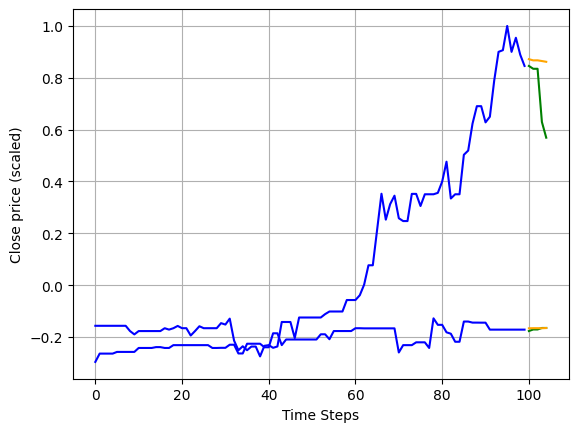

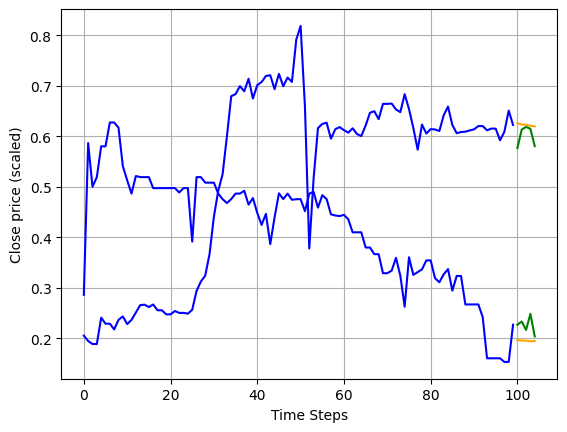

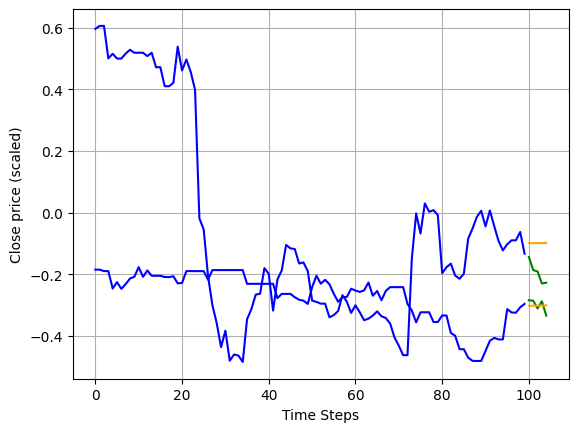

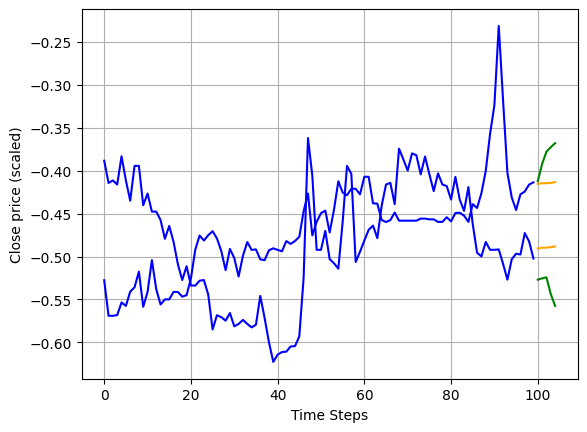

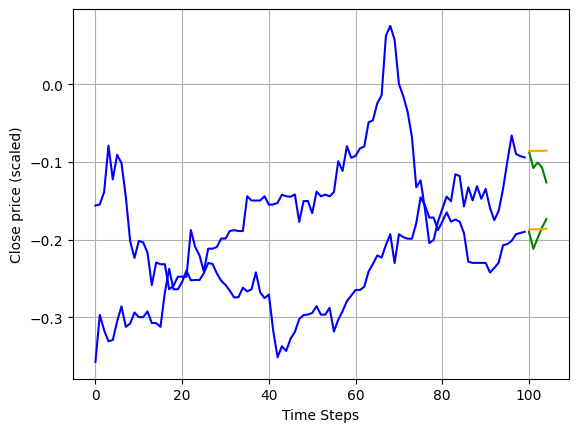

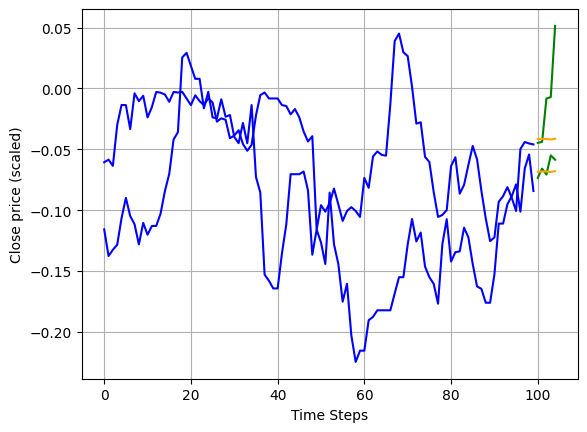

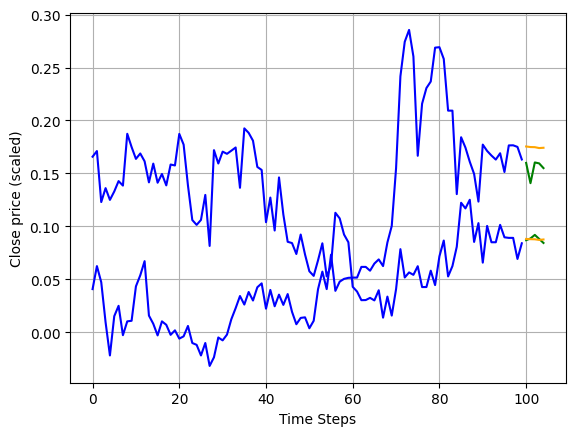

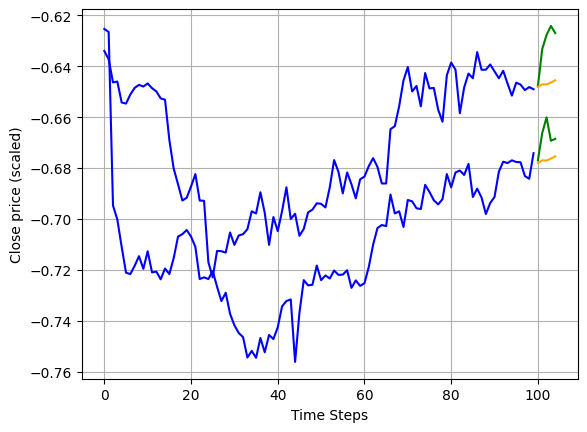

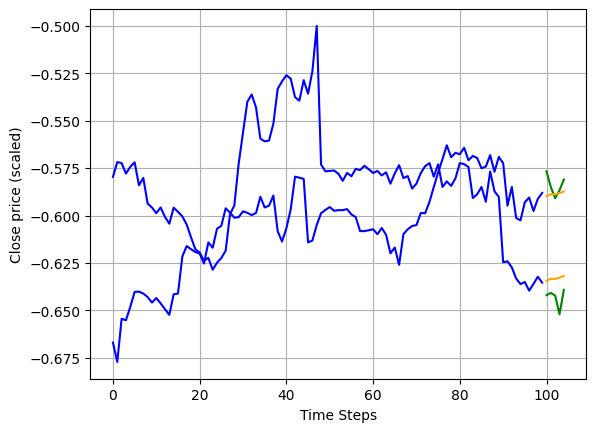

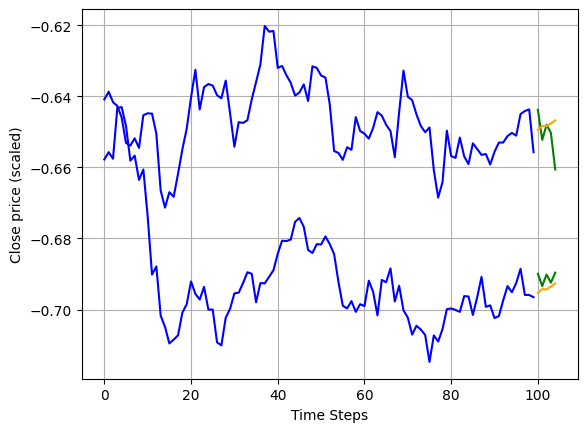

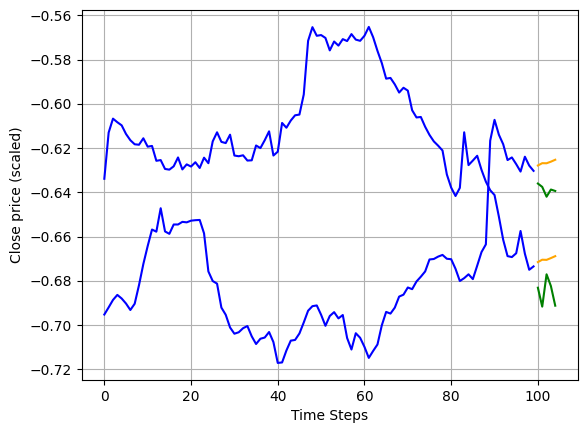

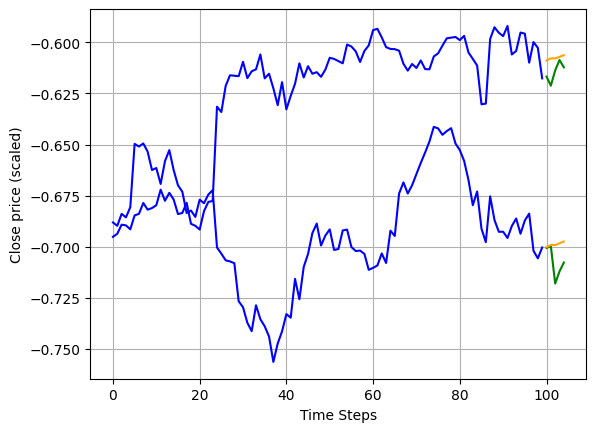

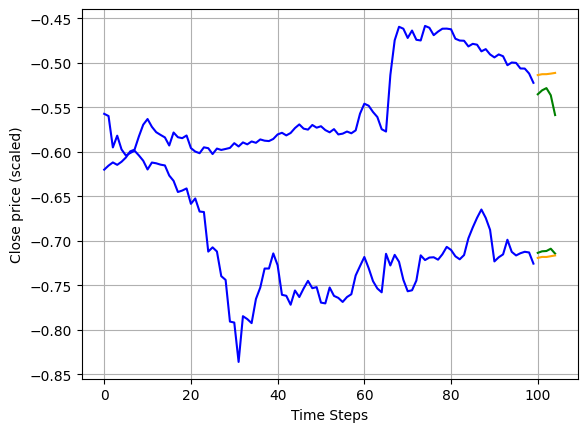

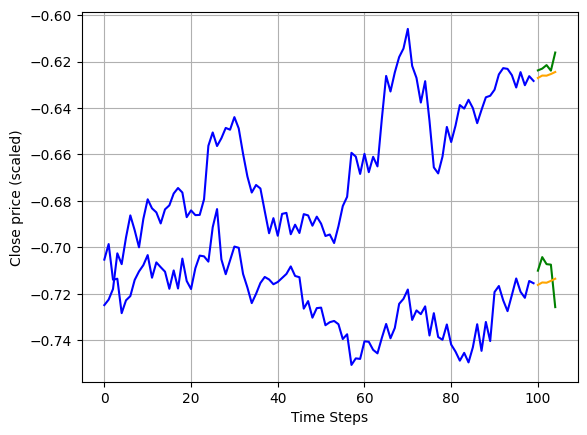

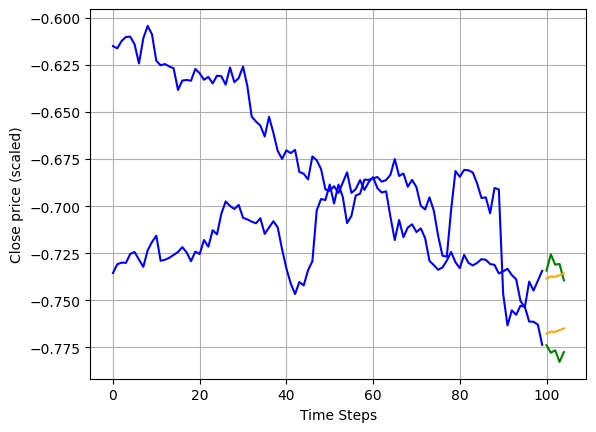

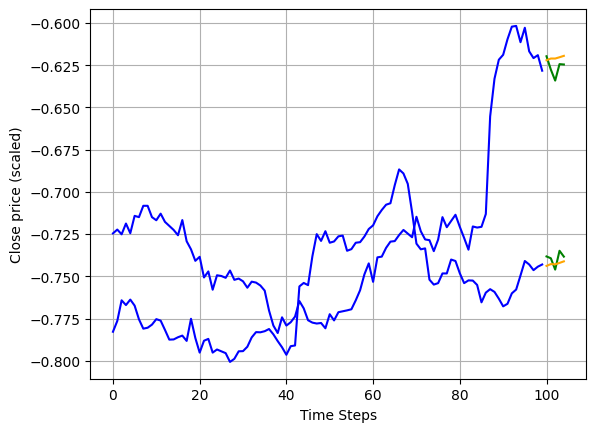

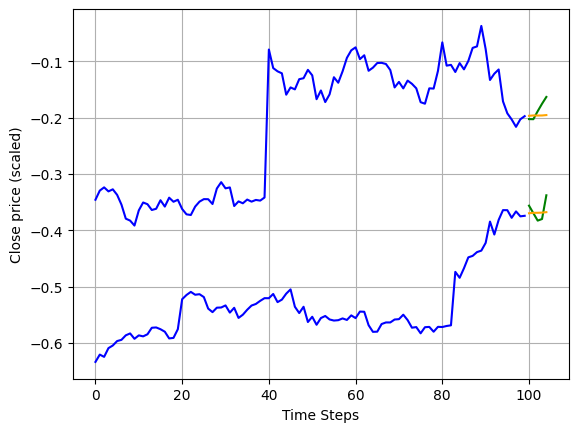

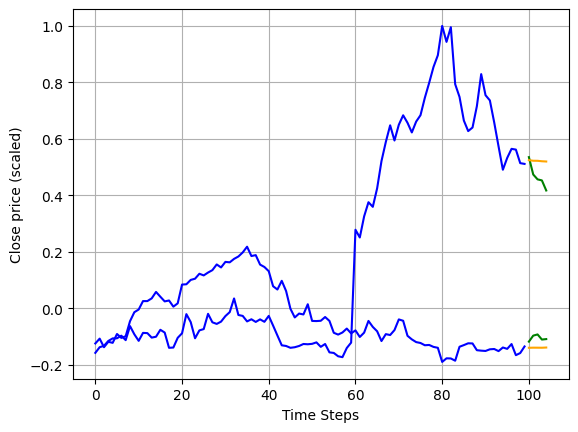

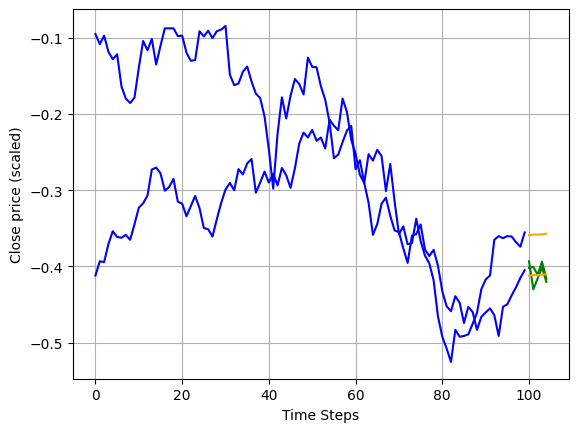

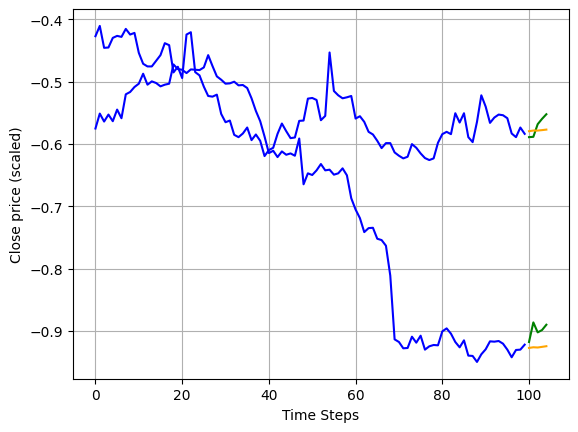

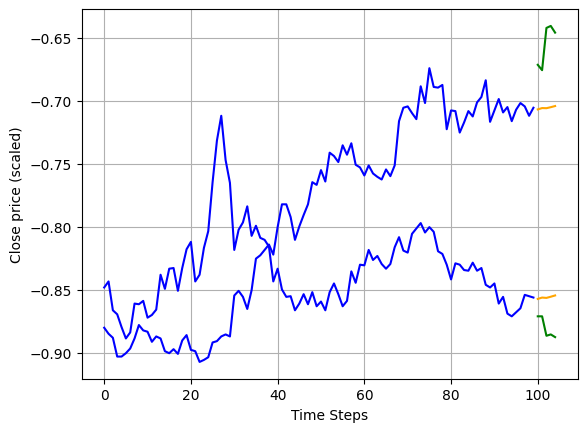

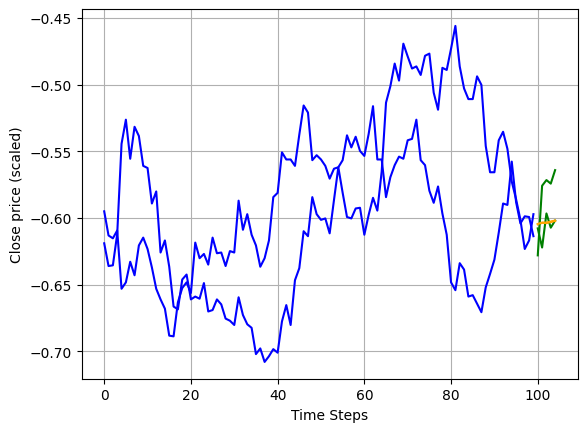

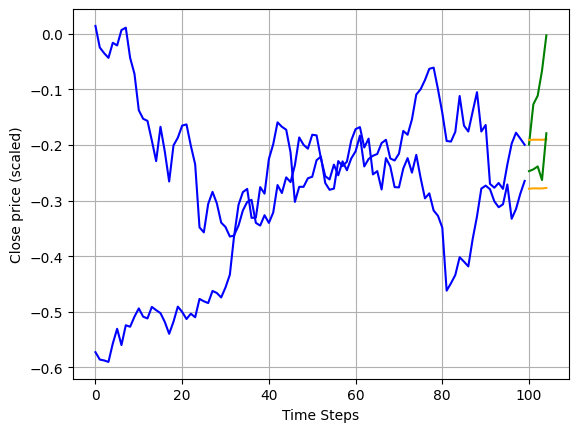

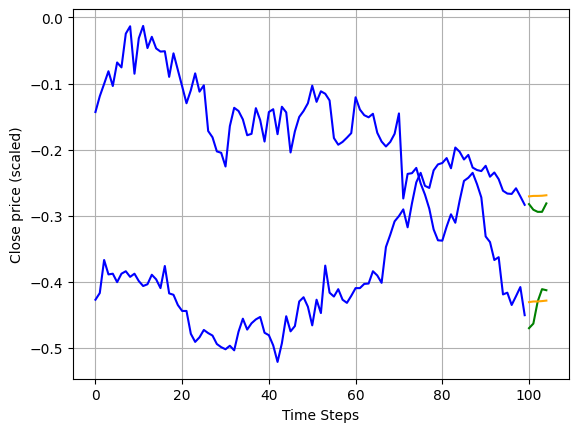

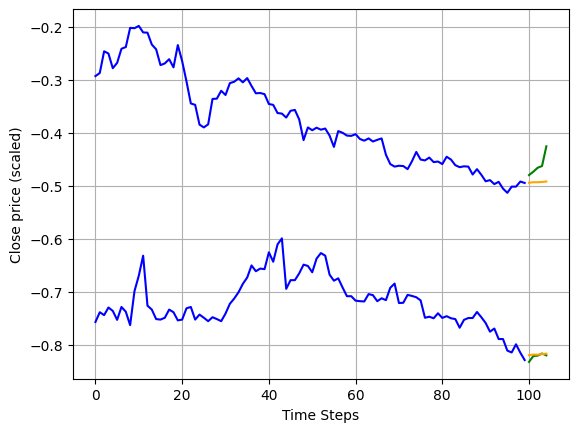

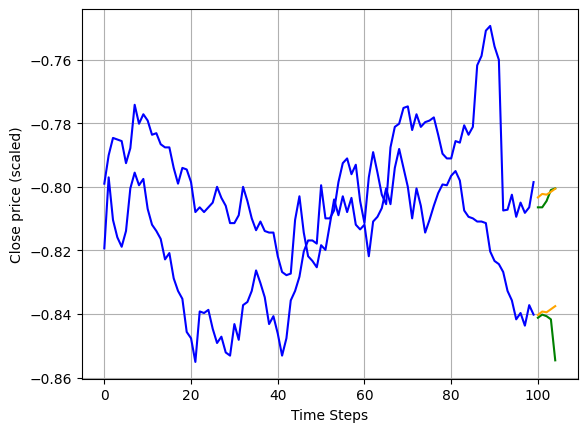

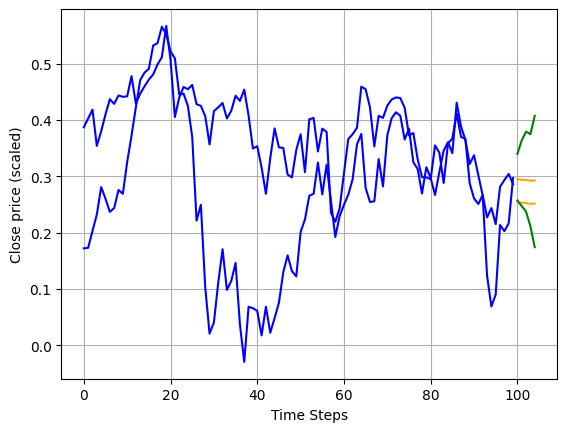

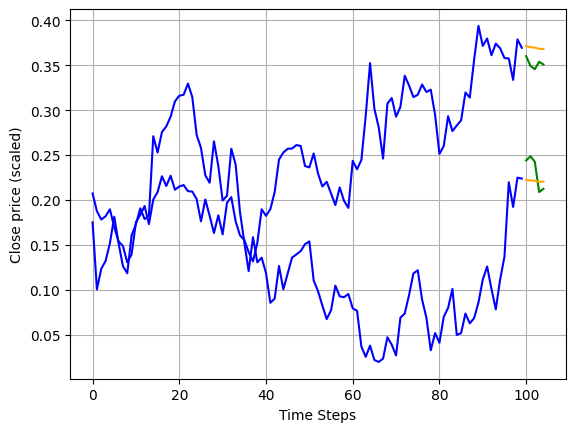

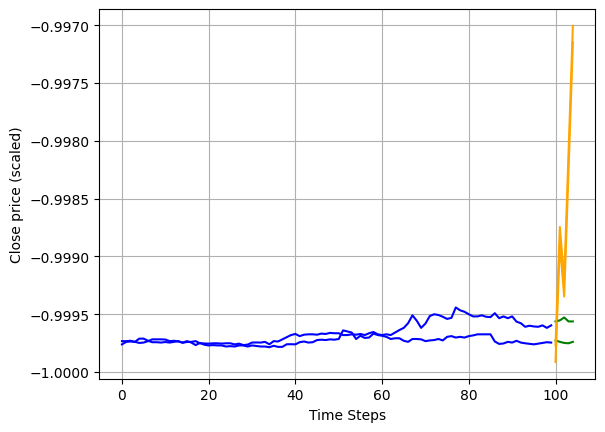

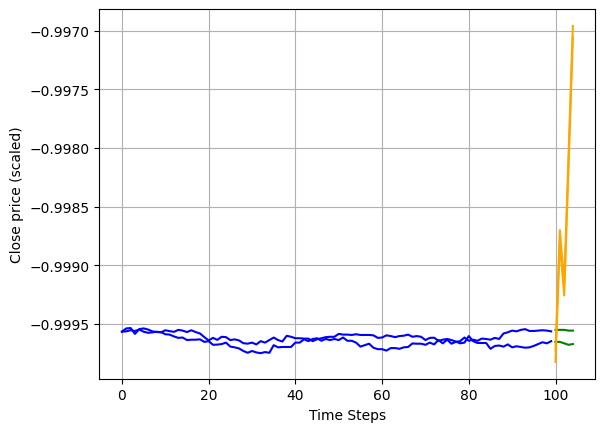

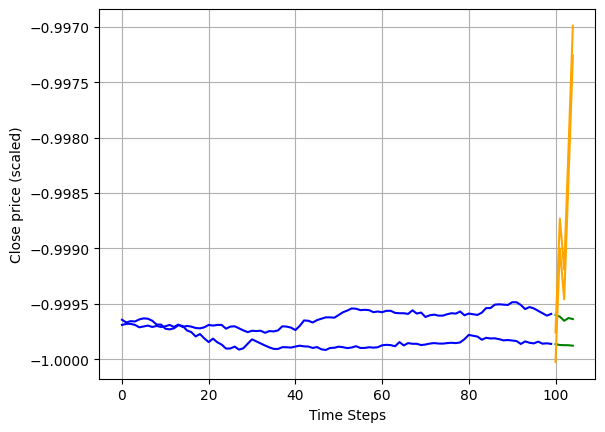

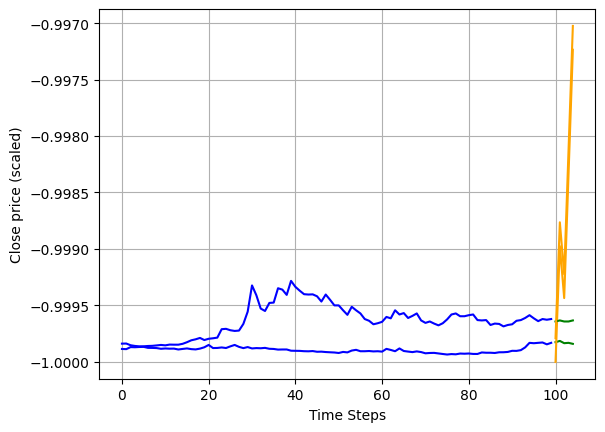

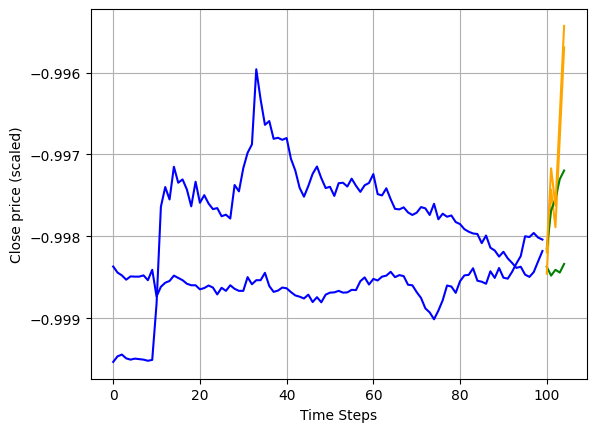

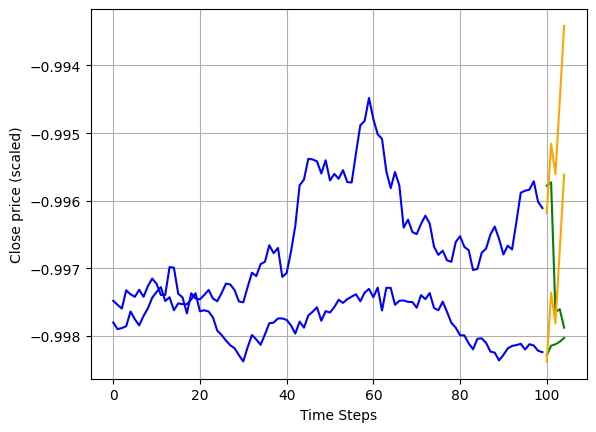

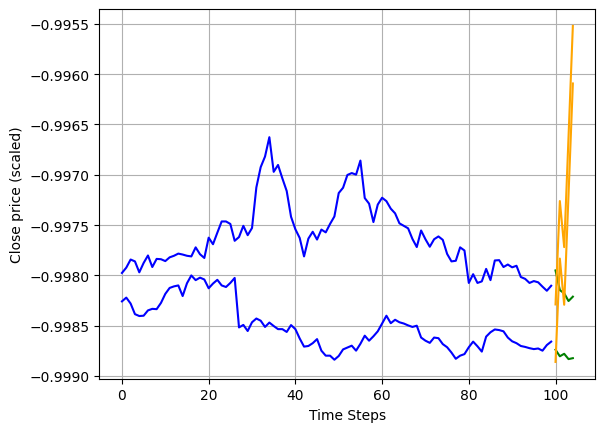

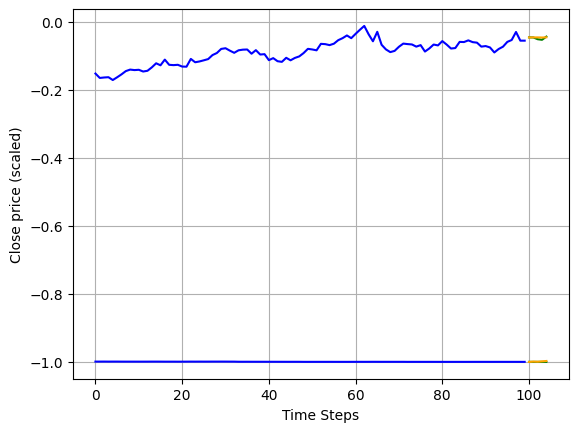

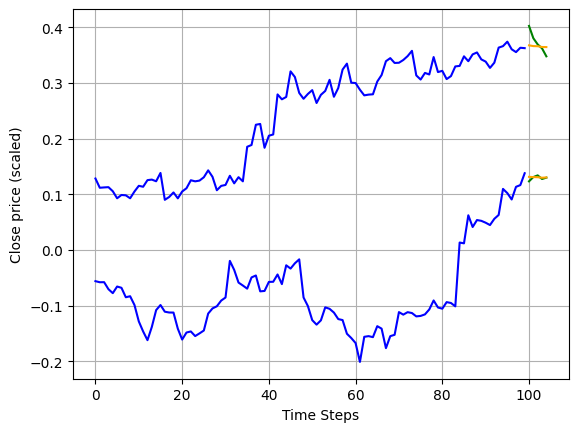

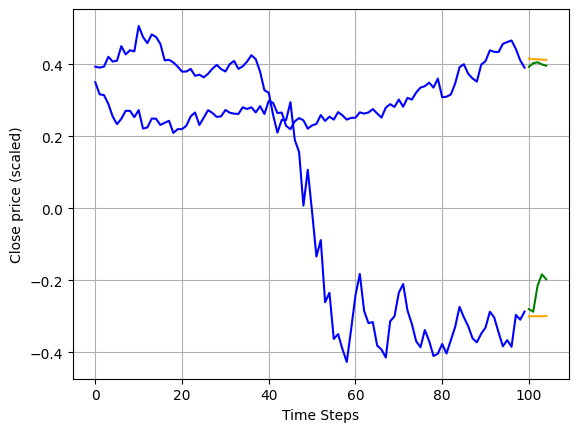

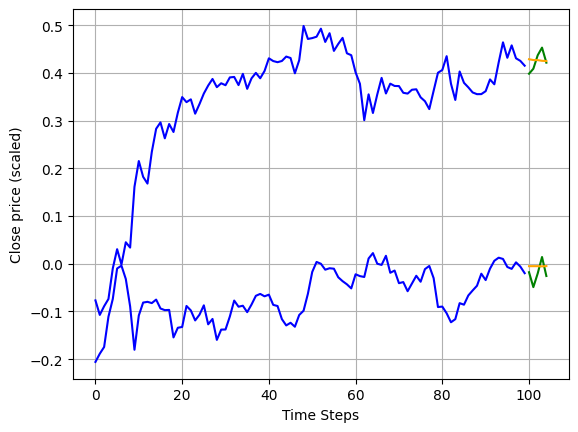

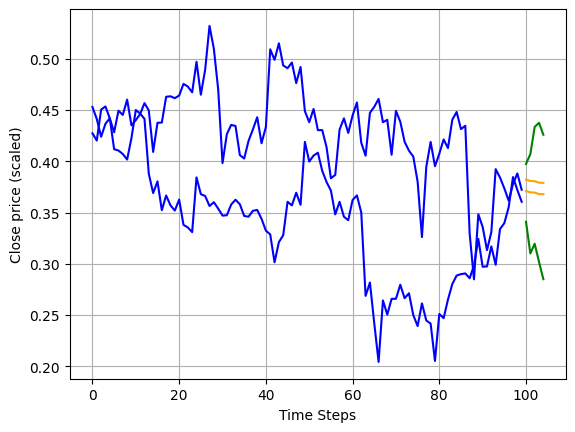

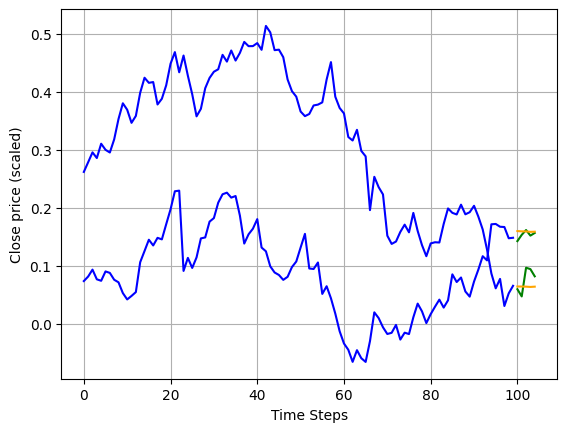

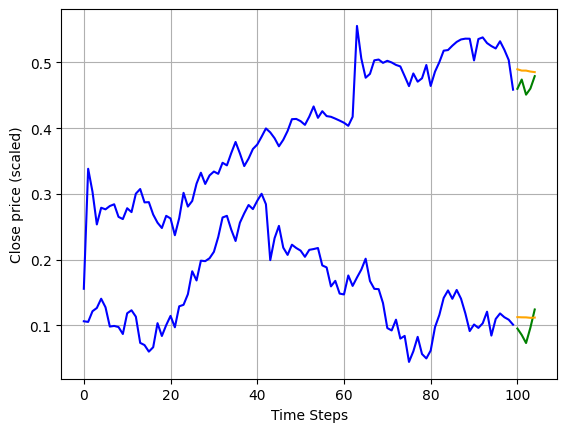

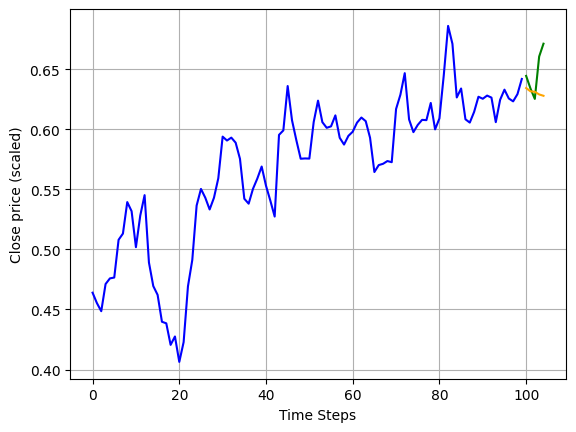

In [7]:
%load_ext autoreload
%autoreload 2

from stat3007_timeseries_forecasting.utils import test_model, plot_predictions
predictions = test_model(model, test_sequences)
plot_predictions(test_sequences, predictions, sequences_per_plot=2)